## **Importação das bibliotecas e dados (AEP e Duas Unas)**

In [1]:

#%pip install ipykernel
# %pip install scikit-learn
# %pip install matplotlib
# %pip install keras
# %pip install tensorflow
# %pip install pandas
# %pip install plotly
#%pip install seaborn
#%pip install nbformat





In [2]:
import numpy as np    #Biblioteca matemática
import pandas as pd   #Biblioteca para manipulação de dados
import matplotlib.pyplot as plt #Biblioteca gráfica
import tensorflow as tf #Biblioteca para machine learning
import sklearn.preprocessing #Biblioteca para machine learning
import random
import keras
import plotly.express as px #Biblioteca gráfica
import seaborn as sns #Biblioteca gráfica e estatística
import itertools
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold

from tensorflow.keras import backend as K
from tensorflow.keras.initializers import GlorotUniform    #Inicializador de pesos
from keras.regularizers import l1_l2
from tensorflow.keras.models import load_model

from keras.layers import Dense,Dropout,SimpleRNN,LSTM #Biblioteca para deep learning
from keras.models import Sequential

import json
import os
import re

#here = os.path.dirname(os.path.abspath(__file__))

#tf.keras.utils.set_random_seed(1234)

# Mecanismo de Atenção
from keras.layers import Layer
import keras.backend as K

base_path = './dataset/'

In [3]:
#Busca dos dados de pré-treinamento no drive (AEP DATASET)

#path1 = f'{base_path}AEP_hourly.csv'
#print(path1)
#dados = pd.read_csv(path1,sep=',', encoding='iso-8859-1') #, index_col='Data', parse_dates=['Data'])
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)


In [4]:
#Busca dos dados de treinamento (DUAS UNAS DATASET)

#path2 = f'{base_path}duas_unas/days/grouped_3_days.csv'
#dados2 = pd.read_csv(path2,sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

In [5]:
# Caminho para as pastas de datasets
path_datasets_testes = f'{base_path}testes/teste3-semanal-com-aep/datasets'
path_datasets_results = f'{base_path}testes/teste3-semanal-com-aep/results'

In [6]:
# Função para carregar e processar os datasets
def carregar_dados(path):
    # Lista todos os arquivos na pasta especificada de forma ordenada
    arquivos = os.listdir(path)
    
    # Função para extrair o número e a unidade (hours ou days) do nome do arquivo
    def extrair_numero_unidade(arquivo):
        # Procura por "_X_hours" ou "_X_days" no nome do arquivo
        match = re.search(r'_(\d+)_(hours|days)', arquivo)
        if match:
            numero = int(match.group(1))  # Extrai o número
            unidade = match.group(2)      # Extrai a unidade (hours ou days)
            return (unidade, numero)
        return ("", float('inf'))  # Caso não encontre o padrão, retorna um valor alto para ignorar
    
    # Ordena os arquivos de acordo com o número extraído
    arquivos_ordenados = sorted(arquivos, key=extrair_numero_unidade)
    
    # Inicializa uma lista para armazenar os datasets
    datasets = []
    
    for arquivo in arquivos_ordenados:
        if arquivo.endswith('.csv'):  # Verifica se o arquivo é um CSV
            # Carrega o dataset
            df = pd.read_csv(os.path.join(path, arquivo))
            datasets.append((arquivo, df))
    
    return datasets

In [7]:
# Carregar datasets das pastas
datasets_testes = carregar_dados(path_datasets_testes)


In [8]:
datasets_testes[0]

('1_AEP_semanal.csv',
       timestamp  kWh fornecido
 0    2004-10-01      2316942.0
 1    2004-10-08      2337560.0
 2    2004-10-15      2408833.0
 3    2004-10-22      2349880.0
 4    2004-10-29      2341649.0
 ..          ...            ...
 717  2018-06-29      2890663.0
 718  2018-07-06      2642006.0
 719  2018-07-13      2786664.0
 720  2018-07-20      2565247.0
 721  2018-07-27      2519398.0
 
 [722 rows x 2 columns])

In [9]:
#datasets_teste1[len(datasets_teste1)-1][0]
for i in range(len(datasets_testes)):
    #print(datasets_testes[i])  # Verifique as primeiras linhas do DataFrame
    print(datasets_testes[i][0], datasets_testes[i][1])  # Verifique os nomes das colunas

1_AEP_semanal.csv       timestamp  kWh fornecido
0    2004-10-01      2316942.0
1    2004-10-08      2337560.0
2    2004-10-15      2408833.0
3    2004-10-22      2349880.0
4    2004-10-29      2341649.0
..          ...            ...
717  2018-06-29      2890663.0
718  2018-07-06      2642006.0
719  2018-07-13      2786664.0
720  2018-07-20      2565247.0
721  2018-07-27      2519398.0

[722 rows x 2 columns]
2_agrupado_semana_Pirapama_2021.csv      timestamp  kWh fornecido
0   2021-01-01       892576.8
1   2021-01-08       894029.4
2   2021-01-15       892463.4
3   2021-01-22       882127.8
4   2021-01-29       889029.0
5   2021-02-05       885308.4
6   2021-02-12       870868.8
7   2021-02-19       841131.0
8   2021-02-26       843420.6
9   2021-03-05       848599.2
10  2021-03-12       847594.8
11  2021-03-19       832399.2
12  2021-03-26       838706.4
13  2021-04-02       841617.0
14  2021-04-09       820000.8
15  2021-04-16       863692.2
16  2021-04-23       864097.2
17  2021-0

## **Dados de Pré-treinamento (AEP)**


In [574]:
dados = dados.sort_values(by='DateTime')
dados = dados.set_index('DateTime')
dados

NameError: name 'dados' is not defined

In [ ]:
hist1 = px.histogram(dados, x = 'kWh fornecido', nbins = 60)  #Histograma kWh fornecido
hist1.update_layout(width = 800, height = 400, title_text = 'Distribuição das Potências')
hist1.show()

In [ ]:
sns.histplot(dados, x='kWh fornecido', bins=100, color="orange", kde=True, stat="count");  # kde=true - plota linha de tendência da densidade

In [ ]:
px.box(dados, y='kWh fornecido')  #Boxplot - Visualização dos outliers

In [ ]:
dados['kWh fornecido'].astype(float)
dados.plot(figsize=(30,6),legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')

plt.show()

## **Dados de Treinamento (Duas Unas)**

In [ ]:
dados2 = dados2.sort_values(by='timestamp')
dados2 = dados2.set_index('timestamp')
dados2

In [ ]:
#Histograma dos dados
hist1 = px.histogram(dados2, x = 'kWh fornecido', nbins = 60)  #Histograma kWh fornecido
hist1.update_layout (width = 600, height = 400, title_text = 'Distribuição das Potências')
hist1.show()

In [ ]:
#Curva de tendência dos dados
sns.histplot(dados2, x='kWh fornecido', bins=30, color="orange", kde=True, stat="count");  # kde=true - plota linha de tendência da densidade

In [ ]:
#Boxplot - Visualização dos outliers
px.box(dados2, y='kWh fornecido')

In [ ]:
dados2['kWh fornecido'].astype(float)
dados2.plot(figsize=(30,6),legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')

plt.show()

## **Normalização Nova**

In [10]:
scaler = MinMaxScaler()
def MinMax(dados):
  dados = dados.sort_values(by='timestamp')
  dados = dados.set_index('timestamp')
  max = dados.max().iloc[0]
  min = dados.min().iloc[0]
  scaled_data = scaler.fit_transform(dados)
  return pd.DataFrame(scaled_data), max, min


## **Normalização dos dados**




In [52]:
# Padronização MinMax
#def padronizacao(dados):
#  min = dados.min().iloc[0]
#  max = dados.max().iloc[0]
#  print(min)
#  print(max)
#  de_padr = []
#  for i in range(len(dados)-1):
#    valor = dados.iloc[i,0]
#    valor = valor - min
#    valor = valor/[max-min]
#    de_padr.append(valor)

#  return pd.DataFrame(de_padr)

In [ ]:
#Estatística dos dados AEP
dados.describe()

In [ ]:
df_AEP,max_AEP,min_AEP = MinMax(dados)

In [83]:
def plot_dadospadronizados(dados):
  dados.plot(figsize=(30,6),color = 'red',legend=True)  #Gráfico PJME_MW ao longo dos 16 anos

  plt.title('Perfil de Consumo de Energia EEAB DUAS UNAS - 2022')
  plt.yticks(np.arange(0,1.1,step=0.1))
  plt.show()

In [ ]:
plot_dadospadronizados(df_AEP)

In [ ]:
#Estatística dados Duas Unas
dados2.describe()

In [ ]:
df_DU,max_DU,min_DU = MinMax(dados2)
df_DU = pd.DataFrame(df_DU)
print(max_DU)
print(min_DU)


In [ ]:
df_DU.describe()

In [ ]:
plot_dadospadronizados(df_DU)

## **AEP Obsoleto**

In [158]:
#Train e Test Data dados AEP

# X_train_A, y_train_A, X_test_A, y_test_A, y_plot_A = load_data(df_AEP, seq_len, out_steps, 0.7, 0.3)   #Chama a função load_data

# print('X_train.shape = ',X_train_A.shape)   #Printa a dimensionalidade de X_train, y_train, X_test, y_test
# print('y_train.shape = ', y_train_A.shape)
# print('X_test.shape = ', X_test_A.shape)
# print('y_test.shape = ',y_test_A.shape)
# print('y_plot.shape = ',y_plot_A.shape)

In [159]:
# Verificando se nos dados de entrada e saída há NaN ou infinitos
#print(np.any(np.isnan(X_train_U)), np.any(np.isnan(y_train_U)))
#print(np.any(np.isinf(X_train_U)), np.any(np.isinf(y_train_U)))

#print(np.any(np.isnan(X_test_U)), np.any(np.isnan(y_test_U)))
#print(np.any(np.isinf(X_test_U)), np.any(np.isinf(y_test_U)))

In [ ]:
#   ETAPA DE MODELAGEM DA REDE LSTM

# Busca de hiperparâmetros (random search)

lstm_model = Sequential()   # Modo sequencial - saída de uma camada é aplicada na entrada da seguinte
      #       (Dimensionalidade da saída, função de ativação, deve retornar a última saída na saída, dimensionalidade da entrada (20,1)

#Saulo não define a função de ativação. Default: hyperbolic tangent (tanh)

                                                          #X_train.shape[1]
lstm_model.add(LSTM(100,return_sequences=True, input_shape=(seq_len,1))) # Apenas a primeira camada informa input_shape. As demais fazem inferência
lstm_model.add(Dropout(0.3)) # Taxa de atenuação aplicada à saída para evitar overfitting - Elimina aleatoriamente alguns neurônios

lstm_model.add(LSTM(100,return_sequences=True))
lstm_model.add(Dropout(0.3))

lstm_model.add(LSTM(100,return_sequences=False)) #Anteriormente era FALSE. Foi alterado devido à adição da camada Attention
lstm_model.add(Dropout(0.3))

# ATTENTION #
#lstm_model.add(attention(return_sequences=False))

lstm_model.add(Dense(1)) # Dense - Camada totalmente conectada com dimensionalidade de saída igual a 1

lstm_model.summary() # Printa um sumário da rede

In [166]:
#Pré-treinamento com dados AEP
#treinamento(lstm_model,X_train_A,y_train_A,0.001,500,5)

In [167]:
#pesos_treinamento1 = lstm_model.get_weights()
#pesos_LSTM1_t1 = lstm_model.get_layer(name='lstm').get_weights()
#pesos_LSTM2_t1 = lstm_model.get_layer(name='lstm_1').get_weights()
#pesos_LSTM3_t1 = lstm_model.get_layer(name='lstm_2').get_weights()

In [168]:
#np.savez('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM1_t1.npz',W=pesos_LSTM1_t1[0], U=pesos_LSTM1_t1[1], b=pesos_LSTM1_t1[2])
#np.savez('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM2_t1.npz',W=pesos_LSTM2_t1[0], U=pesos_LSTM2_t1[1], b=pesos_LSTM2_t1[2])
#np.savez('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM3_t1.npz',W=pesos_LSTM3_t1[0], U=pesos_LSTM3_t1[1], b=pesos_LSTM3_t1[2])

In [169]:
#lstm_model.save('lstm_model_HOJE.keras')

In [170]:
#lstm_model.save('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/lstm_model_HOJE')

In [171]:
#lstm_model.save('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/lstm_model_HOJE.keras')

In [172]:
#Testes com os dados AEP
#teste = testes(lstm_model,X_test_A,y_test_A)

In [173]:
#Gráfico comparativo dos valores previstos e reais AEP
#plot_predictions_univar(y_test_A, teste,"Predições para os dados AEP")

In [174]:
#pesos_LSTM1 = keras.models.load_model('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM1_t1.npz')
#pesos_LSTM2 = keras.models.load_model('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM2_t1.npz')
#pesos_LSTM3 = keras.models.load_model('/content/drive/MyDrive/Mestrado/Cursos/Machine Learning com Python/TensorFlow/Dados_Energia/Modelo/pesos_LSTM3_t1.npz')

## **Treino e Teste**

In [11]:
class attention(Layer):
    #def __init__(self,**kwargs):
    #   self.return_sequences = return_sequences
    #   super(attention,self).__init__(**kwargs)

    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()

# PESOS E BIAS
    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal") # Pesos
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros") # Bias
        super(attention, self).build(input_shape)

# VETOR DE CONTEXTO
    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1) # Produto escalar entre pesos e entradas e soma com bias
        at=K.softmax(et) # Normalização para que o somatório dos pesos seja = 1
        at=K.expand_dims(at,axis=-1)
        output=x*at # Saída (peso-at * entrada-x)
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [12]:
def load_data(stock, seq_len,out_steps, perc_train, perc_test):  # stock == de_df     seq_len == 20

    
    y_plot = []
    X_train = []
    y_train = []
    X_test = []
    y_test = []


    for i in range(seq_len, len(stock)- out_steps + 1):
        X_train.append(stock.iloc[i-seq_len : i, 0])   # Cria, em cada posição de X_train, um vetor coluna [20,1] com as entradas de cada sequência
        y_train.append(stock.iloc[i:i+out_steps, 0])   # Armazena, em cada posição de Y_train, o valor de saída (valor seguinte) correspondente à saída esperada
        y_plot.append(stock.iloc[i,0])
        
    train_size = round(perc_train * len(X_train))  # Tamanho do conjunto de treino
    test_size = len(X_train) - train_size  # Tamanho do conjunto de teste

    #print("train size:", train_size)
    #print("test size:", test_size)

    #1 last 25346 data are going to be used in test
    X_test = X_train[train_size:len(stock)]   # [120000:] # Os vetores colunas das posições 120.000 - final serão utilizados como entrada na etapa de teste
    y_test = y_train[train_size:len(stock)]   # [120000:] # Os valores nas posições 120.000 - final serão utilizados como saída na etapa de teste
    y_plot = y_plot[train_size:len(stock)]

    #2 first 120000 data are going to be used in training
    X_train = X_train[:train_size]  # [:120000] # Os vetores colunas das posições 0 - 119.999 serão utilizados como entrada na etapa de treino
    y_train = y_train[:train_size]  # [:120000] # Os valores nas posições 0 - 119.999 serão utilizados como saída na etapa de treino

    # Criação das sequências de treino e teste
    #for i in range(seq_len, len(stock) - out_steps + 1):
        # Armazenando a sequência de dados para input (X) e a saída esperada (y)
    #    if i < train_size:  # Dados de treino
    #        X_train.append(stock.iloc[i-seq_len:i, 0])  # Adiciona sequência de treino
    #        y_train.append(stock.iloc[i:i+out_steps, 0])  # Adiciona saída correspondente
    #    else:  # Dados de teste
    #        X_test.append(stock.iloc[i-seq_len:i, 0])  # Adiciona sequência de teste
    #        y_test.append(stock.iloc[i:i+out_steps, 0])  # Adiciona saída correspondente
    #        y_plot.append(stock.iloc[i, 0])  # Usado para plotar previsões versus valores reais

    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_plot = np.array(y_plot)

    #4 reshape data to input into RNN models
                                 # 120000
    X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))   #Reorganiza X_train e a transforma numa matriz [120000,20,1], sendo uma sequência por linha

    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))   #Reorganiza X_teste e a transforma numa matriz [25346,20,1], sendo uma sequência por linha

    return [X_train, y_train, X_test, y_test, y_plot]


In [13]:
def rmse(y_true, y_pred):
    mse = K.mean(K.square(y_pred - y_true), axis=-1)
    return K.sqrt(mse)

In [14]:
#    ETAPA DE TREINAMENTO
#   Configuração do modelo para treinamento
def treinamento(modelo, X_treino, Y_treino, l_r, batch, paciencia, shuffle, optimizer_name, loss_function, metrics, validation_method, k_folds=5, validation_split=0.1):
    
    """
    Treina o modelo LSTM com validação.

    Parameters:
        modelo: O modelo a ser treinado.
        X_treino: Dados de entrada para treinamento.
        Y_treino: Dados de saída para treinamento.
        l_r: Taxa de aprendizado.
        batch: Tamanho do batch.
        paciencia: Paciente para early stopping.
        shuffle: Se os dados devem ser embaralhados.
        optimizer_name: O otimizador a ser usado.
        loss_function: A função de perda a ser usada.
        metrics: Métricas para avaliação.
        validation_method: Método de validação ('k-fold' ou 'split').
        k_folds: Número de folds para validação k-fold (padrão é 5).
        validation_split: Proporção para validação se usar validação por divisão.
    """

    #Configuração do otimizador    
    if optimizer_name == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_name == "sgd":
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        raise ValueError(f"Otimizador desconhecido: {optimizer_name}")
    
    modelo.compile(optimizer=optimizer,loss=loss_function, metrics = metrics)
    
    # Aplicar o método de validação
    if validation_method == 'split':
        # Usar validação por divisão
        history = modelo.fit(X_treino, Y_treino, epochs=100000, batch_size=batch, validation_split=validation_split, shuffle=shuffle,
                            callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=paciencia)])
    elif validation_method == 'k-fold':
        # Usar validação k-fold
        kf = KFold(n_splits=min(k_folds, len(X_treino)), shuffle=shuffle)
        for train_index, val_index in kf.split(X_treino):
            X_train, X_val = X_treino[train_index], X_treino[val_index]
            y_train, y_val = Y_treino[train_index], Y_treino[val_index]
            history = modelo.fit(X_train, y_train, epochs=100000, batch_size=batch, validation_data=(X_val, y_val), shuffle=shuffle, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=paciencia))

                                               #batch_size=500                                                                                             #patience=15
    # history = modelo.fit(X_treino, Y_treino, epochs=100000, batch_size=batch, validation_split=0.3, shuffle = shuffle, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=paciencia))   #Treinamento do modelo
    #             (Entrada; saída; ciclos de treinamento com todos os dados; tamanho do lote (1000) que, ao dividir o tamanho da (120.000),
    #              define a quantidade de etapas por ciclo. Após cada etapa, os pesos são atualizados para a próxima etapa.

    # Plotar as perdas de treinamento e validação
    #plt.plot(history.history['loss'], label='Loss de Treinamento')
    #plt.plot(history.history['val_loss'], label='Loss de Validação')
    #plt.xlabel('Épocas')
    #plt.ylabel('Perda')
    #plt.legend()
    #plt.show()

In [15]:
def testes(modelo, X_test, y_test, max_DU, min_DU):
  
  print("X_test contém NaNs?:", np.isnan(X_test).any())
  print("X_test contém valores infinitos?:", np.isinf(X_test).any())
  print("Valores mínimos em X_test:", np.min(X_test))
  if np.any(X_test <= 0):
    print("Erro: X_test contém valores não positivos.")
  #X_test = np.nan_to_num(X_test, nan=0.0, posinf=1.0, neginf=-1.0)
  print("Forma de X_test:", X_test.shape)
  print(f"max_DU: {max_DU}, min_DU: {min_DU}")


  lstm_predictions_testes = modelo.predict(X_test)  # Gera as previsões de saída para as entradas X_test

  lstm_predictions_teste = transf_inversa(lstm_predictions_testes,max_DU, min_DU)
  y_test = transf_inversa(y_test,max_DU, min_DU)
  
  lstm_predictions_testes = np.array(lstm_predictions_testes)
  y_test = np.array(y_test)
  
  # Verificação de formatos
  if lstm_predictions_testes.shape != y_test.shape:
    raise ValueError("As formas das previsões e dos valores reais não correspondem.")


#lstm_predictions_valor_real = normal.inverse_transform(lstm_predictions)

#print("Valor real previsto (kWh): ",lstm_predictions_valor_real)

  lstm_score = r2_score(y_test, lstm_predictions_testes)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
  print("R^2 Score of LSTM model = ",lstm_score)
  print(" ")

  lstm_score2 = mean_absolute_error(y_test, lstm_predictions_testes)
  print("MAE(Erro absoluto médio) Score of LSTM model = ",lstm_score2)
  print(" ")

  lstm_score3 = mean_squared_error(y_test, lstm_predictions_testes)
  print("MSE(Erro quadrático médio) Score of LSTM model = ",lstm_score3)
  print(" ")

  #lstm_score4 = mean_absolute_percentage_error(y_test, lstm_predictions_testes)
  #print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",lstm_score4)

  mape = np.mean(np.abs((y_test - lstm_predictions_testes) / y_test + 1e-10)) * 100 # 1e-10 - Evita divisão por zero

  print(f"MAPE(Erro percentual médio absoluto) Score of LSTM model em % = {mape}%")

#lstm_score5 = cross_val_score(lstm_model, X_test, y_test, cv=3, scoring='neg_mean_squared_error')
#print("MSE(Erro quadrático médio) Score of LSTM model com cross-validation 3 = ",lstm_score5)
  return lstm_predictions_testes

In [16]:
def plot_predictions_univar(test, predicted, title, nome, path_datasets_testes):
    plt.figure(figsize=(100,40))
    plt.grid(True)
    plt.yticks(np.arange(0,750,step=50))
    plt.plot(test, color='blue',label='Actual power consumption data') #Plota y_test
    plt.plot(predicted, alpha=0.7, color='red',label='Predicted power consumption data') #Plota Y previsto
    plt.title(f'{title}/{nome}')
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()
    
    if nome == datasets_testes[len(datasets_testes)-1][0]:
        # Criar um nome de arquivo único baseado no valor de horizon
        filename = f'unistep_Duas_Unas.png'
        # Salvar o gráfico na pasta especificada
        plt.savefig(f'{path_datasets_testes}/{filename}')
        plt.close()  # Fecha a figura para liberar memória
        print(f"Gráfico salvo em: {path_datasets_testes}/{filename}")

In [17]:
#   ETAPA DE MODELAGEM DA REDE LSTM
def criar_modelo(neurons, activation, stateful, dropout, timesteps, out_steps):
      lstm_model = Sequential()   # Modo sequencial - saída de uma camada é aplicada na entrada da seguinte
      #       (Dimensionalidade da saída, função de ativação, deve retornar a última saída na saída, dimensionalidade da entrada (20,1)

      #Saulo não define a função de ativação. Default: hyperbolic tangent (tanh)

                                                          #X_train.shape[1]
      lstm_model.add(LSTM(neurons,return_sequences=True, input_shape=(timesteps, 1),name='lstm_1',activation = activation, stateful=stateful)) #, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))) # Apenas a primeira camada informa input_shape. As demais fazem inferência
      lstm_model.add(Dropout(dropout)) # Taxa de atenuação aplicada à saída para evitar overfitting - Elimina aleatoriamente alguns neurônios

      lstm_model.add(LSTM(neurons,return_sequences=True,name='lstm_2',activation = activation, stateful=stateful)) #, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
      lstm_model.add(Dropout(dropout))

      lstm_model.add(LSTM(neurons,return_sequences=False,
                             kernel_initializer=GlorotUniform(),  # Inicializador para os pesos
                             recurrent_initializer=GlorotUniform(),  # Inicializador para os pesos recorrentes
                             bias_initializer=GlorotUniform(),name='lstm_3',activation = activation, stateful=stateful))  # Inicializador para os biases)) #Anteriormente era FALSE. Foi alterado devido à adição da camada Attention
                             #kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
      lstm_model.add(Dropout(dropout))

      # ATTENTION #
      #lstm_model.add(attention(return_sequences=False))

      lstm_model.add(Dense(out_steps,
                        kernel_initializer=GlorotUniform(),  # Inicializador para os pesos
                        bias_initializer=GlorotUniform(),  # Inicializador para os biases
                        name='dense_layer')) # Dense - Camada totalmente conectada com dimensionalidade de saída igual a 1

      #lstm_model.summary() # Printa um sumário da rede
      
      return lstm_model

In [18]:
# Carregar os pesos salvos
def carregar_pesos(arquivo_pesos_camada):

  with np.load(arquivo_pesos_camada) as data:
      W = data['W']
      U = data['U']
      b = data['b']
      # Os pesos podem ter mais de um conjunto, então você deve garantir que a ordem e o número estejam corretos.
      loaded_weights = [W, U, b]
      print(W.shape)
      print(U.shape)
      print(b.shape)
  return loaded_weights

In [19]:
def carregar_e_aplicar_pesos(lstm_model):
    
    caminho_LSTM1 = f'{base_path}/pesos_LSTM1_t1.npz'
    caminho_LSTM2 = f'{base_path}/pesos_LSTM2_t1.npz'
    caminho_LSTM3 = f'{base_path}/pesos_LSTM3_t1.npz'
    
    pesos_LSTM1_t1_carregado = carregar_pesos(caminho_LSTM1)
    pesos_LSTM2_t1_carregado = carregar_pesos(caminho_LSTM2)
    pesos_LSTM3_t1_carregado = carregar_pesos(caminho_LSTM3)

    # Aplicar os pesos carregados à camada LSTM
    lstm_model.get_layer(index=0).set_weights(pesos_LSTM1_t1_carregado)
    lstm_model.get_layer(index=2).set_weights(pesos_LSTM2_t1_carregado)

In [20]:
#print(lstm_model.get_layer(index=0))
#print(lstm_model.get_layer(index=1))
#print(lstm_model.get_layer(index=2))
#print(lstm_model.get_layer(index=3))
#print(lstm_model.get_layer(index=4))
#print(lstm_model.get_layer(index=5))
#print(lstm_model.get_layer(index=6))

In [21]:
def comparar_pesos(lista1, lista2):
  """
  Compares two lists of NumPy arrays for equality.

  Args:
    lista1: The first list of NumPy arrays.
    lista2: The second list of NumPy arrays.

  Returns:
    True if all corresponding arrays in the lists are equal, False otherwise.
  """
  if len(lista1) != len(lista2):
    return False
  for i in range(len(lista1)):
    if not np.array_equal(lista1[i], lista2[i]):
      return False
  return True

# # Now you can compare the lists like this:
# sao_iguais = comparar_pesos(pesos_LSTM1_t1, pesos_LSTM1_t1_carregado)
# print(sao_iguais)  # This will print True or False

In [22]:
#print(comparar_pesos(pesos_LSTM1_t1, pesos_LSTM1_t1_carregado))
#print(comparar_pesos(pesos_LSTM2_t1, pesos_LSTM2_t1_carregado))
#print(comparar_pesos(pesos_LSTM3_t1, pesos_LSTM3_t1_carregado))

In [23]:
# Congela as duas primeiras camadas LSTM e suas respectivas camadas dropout subsequentes
def congelar_camadas(lstm_model):
#lstm_model_treinado.layers[2] - Mostra o tipo da camada 2 do modelo
    lstm_model.layers[0].trainable = False
    lstm_model.layers[1].trainable = False
    lstm_model.layers[2].trainable = False
    lstm_model.layers[3].trainable = False
    print(lstm_model_treinado.layers[0].trainable)
    print(lstm_model_treinado.layers[0].trainable)

In [24]:
# Descongela as duas primeiras camadas LSTM e suas respectivas camadas dropout subsequentes
def descongelar_camadas(lstm_model):
    #lstm_model_treinado.layers[2] - Mostra o tipo da camada 2 do modelo
    lstm_model.layers[0].trainable = True
    lstm_model.layers[1].trainable = True
    lstm_model.layers[2].trainable = True
    lstm_model.layers[3].trainable = True
    lstm_model.layers[2].trainable

In [25]:
def sequencia_completa(modelo,janela_entrada,janela_futuro,prediction,y_plot_U, max_DU, min_DU):
    #print(janela_entrada)
    for i in range(janela_futuro):
        #print(janela_entrada[np.newaxis,:,:].shape)
        prediction.append(modelo.predict(janela_entrada[np.newaxis,:,:])[0,0]) #np.newaxis adiciona uma nova dimensão à janela_entrada, que se torna (1,n,1)
        #print(prediction[-1])
        janela_entrada = janela_entrada[1:]
        janela_entrada = np.insert(janela_entrada, (janela_entrada.shape[0]), prediction[-1], axis=0)
        #print(janela[-1])
        #print(janela_entrada)
        
    X_test_U_norm = transf_inversa(janela_entrada,max_DU,min_DU)
    prediction_norm = transf_inversa(prediction,max_DU,min_DU)
    y_plot_U_norm = transf_inversa(y_plot_U[:janela_futuro],max_DU,min_DU)
    
    return X_test_U_norm, prediction_norm, y_plot_U_norm

In [26]:
# Plot history and future
def plot_multistep(history, prediction1 , groundtruth, path_datasets_results, nome, horizon):
    
    print("Tamanho de history:", len(history))
    print("Tamanho de prediction1:", len(prediction1))
    print("Tamanho de groundtruth:", len(groundtruth))
    
    plt.figure(figsize=(20, 4))
    #y_mean = mean(prediction1)
    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')
    plt.legend(loc='upper right')
    #plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)
    plt.yticks(np.arange(0,1000,step=50))
     
    if nome == datasets_testes[len(datasets_testes)-1][0]:
        # Criar um nome de arquivo único baseado no valor de horizon
        filename = f'multistep_horizon{horizon}.png'
        # Salvar o gráfico na pasta especificada
        plt.savefig(f'{path_datasets_results}/{filename}')
        plt.close()  # Fecha a figura para liberar memória
        print(f"Gráfico salvo em: {path_datasets_testes}/{filename}")
        
    #plt.yticks(np.arange(0,1000,step=50))

In [27]:
def transf_inversa(dados,max,min):
    de_padr = []
    for i in range(len(dados)):
        val_norm = dados[i]
        val_norm = val_norm*(max-min)+min
        de_padr.append(val_norm)

    return pd.DataFrame(de_padr)

In [28]:
def avaliacao_multistep(janela_real, janela_prevista):
    
    # Converte as listas para arrays NumPy
    janela_real = np.array(janela_real)
    janela_prevista = np.array(janela_prevista)
    
    if len(janela_real) != len(janela_prevista):
        raise ValueError("As janelas reais e previstas devem ter o mesmo comprimento.")

    else:
        #r2 =  round(r2_score(janela_real, janela_prevista), 2)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
        #print("R^2 Score of LSTM model = ",r2)
        #print(" ")

        mae = round(mean_absolute_error(janela_real, janela_prevista), 3) # Arredondamento com três casas decimais
        print("MAE(Erro absoluto médio) Score of LSTM model = ",mae)
        print(" ")

        mse = round(mean_squared_error(janela_real, janela_prevista), 3)
        print("MSE(Erro quadrático médio) Score of LSTM model = ",mse)
        print(" ")
        
        rmse = round(np.sqrt(mse), 3)
        print("RMSE(Raiz do erro quadrático médio) Score of LSTM model = ",rmse)
        print(" ")

        mape = round(mean_absolute_percentage_error(janela_real, janela_prevista), 2)
        print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",mape)
        print(" ")
        
        ### Cálculo da ACURÁCIA ###
        
        # Calcula a diferença percentual
        diferencas_percentuais = np.abs((janela_real - janela_prevista) / janela_real)

        # Conta quantas diferenças percentuais estão dentro da tolerância
        acertos = np.sum(diferencas_percentuais <= 0.05) #0.05 é a tolerância

        # Calcula a acurácia
        acuracia = acertos / len(janela_real)   
        acuracia = round(100 * acuracia, 2)
        
        print("Accuracy Score of LSTM model = ",acuracia)
    
    return mae, mse, rmse, mape, acuracia

In [29]:
def multistep_resultado(lstm_model_treinado, janela, horizon, prediction_multi, y_plot_U, train_ratio, test_ratio, batch_size, patience, optimizer, learning_rate, loss_function, metrics, shuffle, stateful, activation, neurons, timesteps, dropout, nome, max_DU, min_DU, path_datasets_results):
    
    prediction_multi = []
    X_test_U_norm,prediction_norm,y_plot_U_norm = sequencia_completa(lstm_model_treinado,janela,horizon,prediction_multi,y_plot_U, max_DU, min_DU)
    plot_multistep(X_test_U_norm,prediction_norm,y_plot_U_norm, path_datasets_results, nome, horizon)        
    mae, mse, rmse, mape, acuracia = avaliacao_multistep(y_plot_U_norm, prediction_norm)
    salvar_resultados(mae, mse, rmse, mape, acuracia, train_ratio, test_ratio, horizon, batch_size, patience, optimizer, learning_rate, loss_function, metrics, shuffle, stateful, activation, neurons, timesteps, dropout, nome, path_datasets_results)
    
    return   

In [30]:
# Automatizar os splits de treino/teste
current_filename = None
results = []  # Para armazenar os resultados de cada execução
def salvar_resultados(mae, mse, rmse, mape, acuracia, train_ratio, test_ratio, horizon, batch_size, patience, optimizer, learning_rate, loss_function, metrics, shuffle, stateful, activation, neurons, timesteps, dropout, nome, path_datasets_results):
    global current_filename, results
    
    # Se o nome do arquivo mudou, salvar os resultados e reiniciar a lista
    if current_filename != nome:
        # Atualiza o nome do arquivo atual e reinicia a lista de resultados
        current_filename = nome
        results = []  # Reinicia a lista de resultados
    
    # Armazenar os resultados
    results.append({
        'train_ratio': train_ratio,
        'test_ratio': test_ratio,
        'learning_rate': learning_rate,
        'batch_size': batch_size,
        'patience': patience,
        'optimizer': optimizer,
        'activation': activation,
        'loss_function': loss_function,
        'metrics': metrics,
        'shuffle': shuffle,
        'stateful': stateful,
        'neurons': neurons,
        'dropout': dropout,
        'timesteps': timesteps,
        'horizon': horizon,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'mape': mape,
        'accuracy': acuracia
    })
            
    # Salvar os resultados em um arquivo CSV ou JSON
    results_df = pd.DataFrame(results)
    results_df.to_csv(f'{path_datasets_results}/train_test_results({nome}).csv', index=False)
    #results_df.to_csv(f'train_test_results({nome}).csv', index=False)
    print(f'Terminado treino/teste com proporção {train_ratio}/{test_ratio} -> MSE: {mse}, MAE: {mae}, MAPE: {mape}')

In [31]:
# Gerar combinações de hiperparâmetros para treino
def gerar_combinacoes_hiperparametros(config, agrupamento):
    """
    Gera todas as combinações possíveis de hiperparâmetros baseadas no arquivo config.json.

    Args:
        config (dict): O dicionário de configurações carregado do arquivo JSON.

    Returns:
        list: Uma lista de tuplas com todas as combinações possíveis de hiperparâmetros.
    """
        
    """
    stateful: Se definido como True, as camadas LSTM manterão seu estado entre as batches durante o treinamento.
    Isso é útil para sequências longas, mas requer que o tamanho das batches seja consistente. Se False, a rede reinicia seu estado para cada batch.

    shuffle: Se definido como True, os dados de treinamento serão embaralhados a cada época.
    Isso ajuda a evitar que a rede aprenda padrões indesejados nas sequências de dados. Se stateful for True, shuffle deve ser False,
    pois a ordem dos dados é importante para manter a continuidade do estado.
    """    
        
    if agrupamento not in ['days', 'hours']:
        raise ValueError("O agrupamento deve ser 'dias' ou 'horas'.")
    
    if agrupamento == 'days':
        batch_size = config['training']['batch_size_days']
        timesteps = config['training']['timesteps_days']
    else:  # agrupamento == 'horas'
        batch_size = config['training']['batch_size_hours']
        timesteps = config['training']['timesteps_hours']

    param_combinations = []
    
    # Iterar sobre as opções de shuffle e stateful
    #for stateful in config['training']['stateful']:
        #shuffle = not stateful  # Se stateful, então shuffle deve ser False

            # Gerar combinações de hiperparâmetros para treino
    combinations = itertools.product(
                batch_size,
                config['training']['patience'],
                config['training']['optimizer'],
                config['training']['learning_rate'],
                config['training']['loss_function'],
                config['training']['metrics'],
                config['training']['shuffle'],
                config['training']['stateful'],
                config['training']['activation'],
                config['training']['neurons'],
                timesteps,
                config['training']['dropout']
            )

    param_combinations.extend(combinations)

    print(f"Total de combinações: {len(param_combinations)}")  # Checar quantas combinações
    return param_combinations

c:\Users\Renan Torres\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1_AEP_semanal.csv
X_train.shape =  (497, 12, 1)
y_train.shape =  (497, 1)
X_test.shape =  (213, 12, 1)
y_test.shape =  (213, 1)
y_plot.shape =  (213,)
Epoch 1/100000
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 220ms/step - accuracy: 0.0000e+00 - loss: 0.2106 - val_accuracy: 0.0000e+00 - val_loss: 0.0559
Epoch 2/100000
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.0000e+00 - loss: 0.0537 - val_accuracy: 0.0000e+00 - val_loss: 0.0408
Epoch 3/100000
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.0000e+00 - loss: 0.0443 - val_accuracy: 0.0000e+00 - val_loss: 0.0394
Epoch 4/100000
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.0000e+00 - loss: 0.0357 - val_accuracy: 0.0000e+00 - val_loss: 0.0370
Epoch 5/100000
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.0000e+00 - loss: 0.0438 - val_accuracy: 0.0000e+00 - val_loss: 0.0351
Epoch 6/100000
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.0000e+00 - loss: 0.0359 - val_accuracy: 0.0000e+00 - val_loss: 0.0275
Epoch 7/1

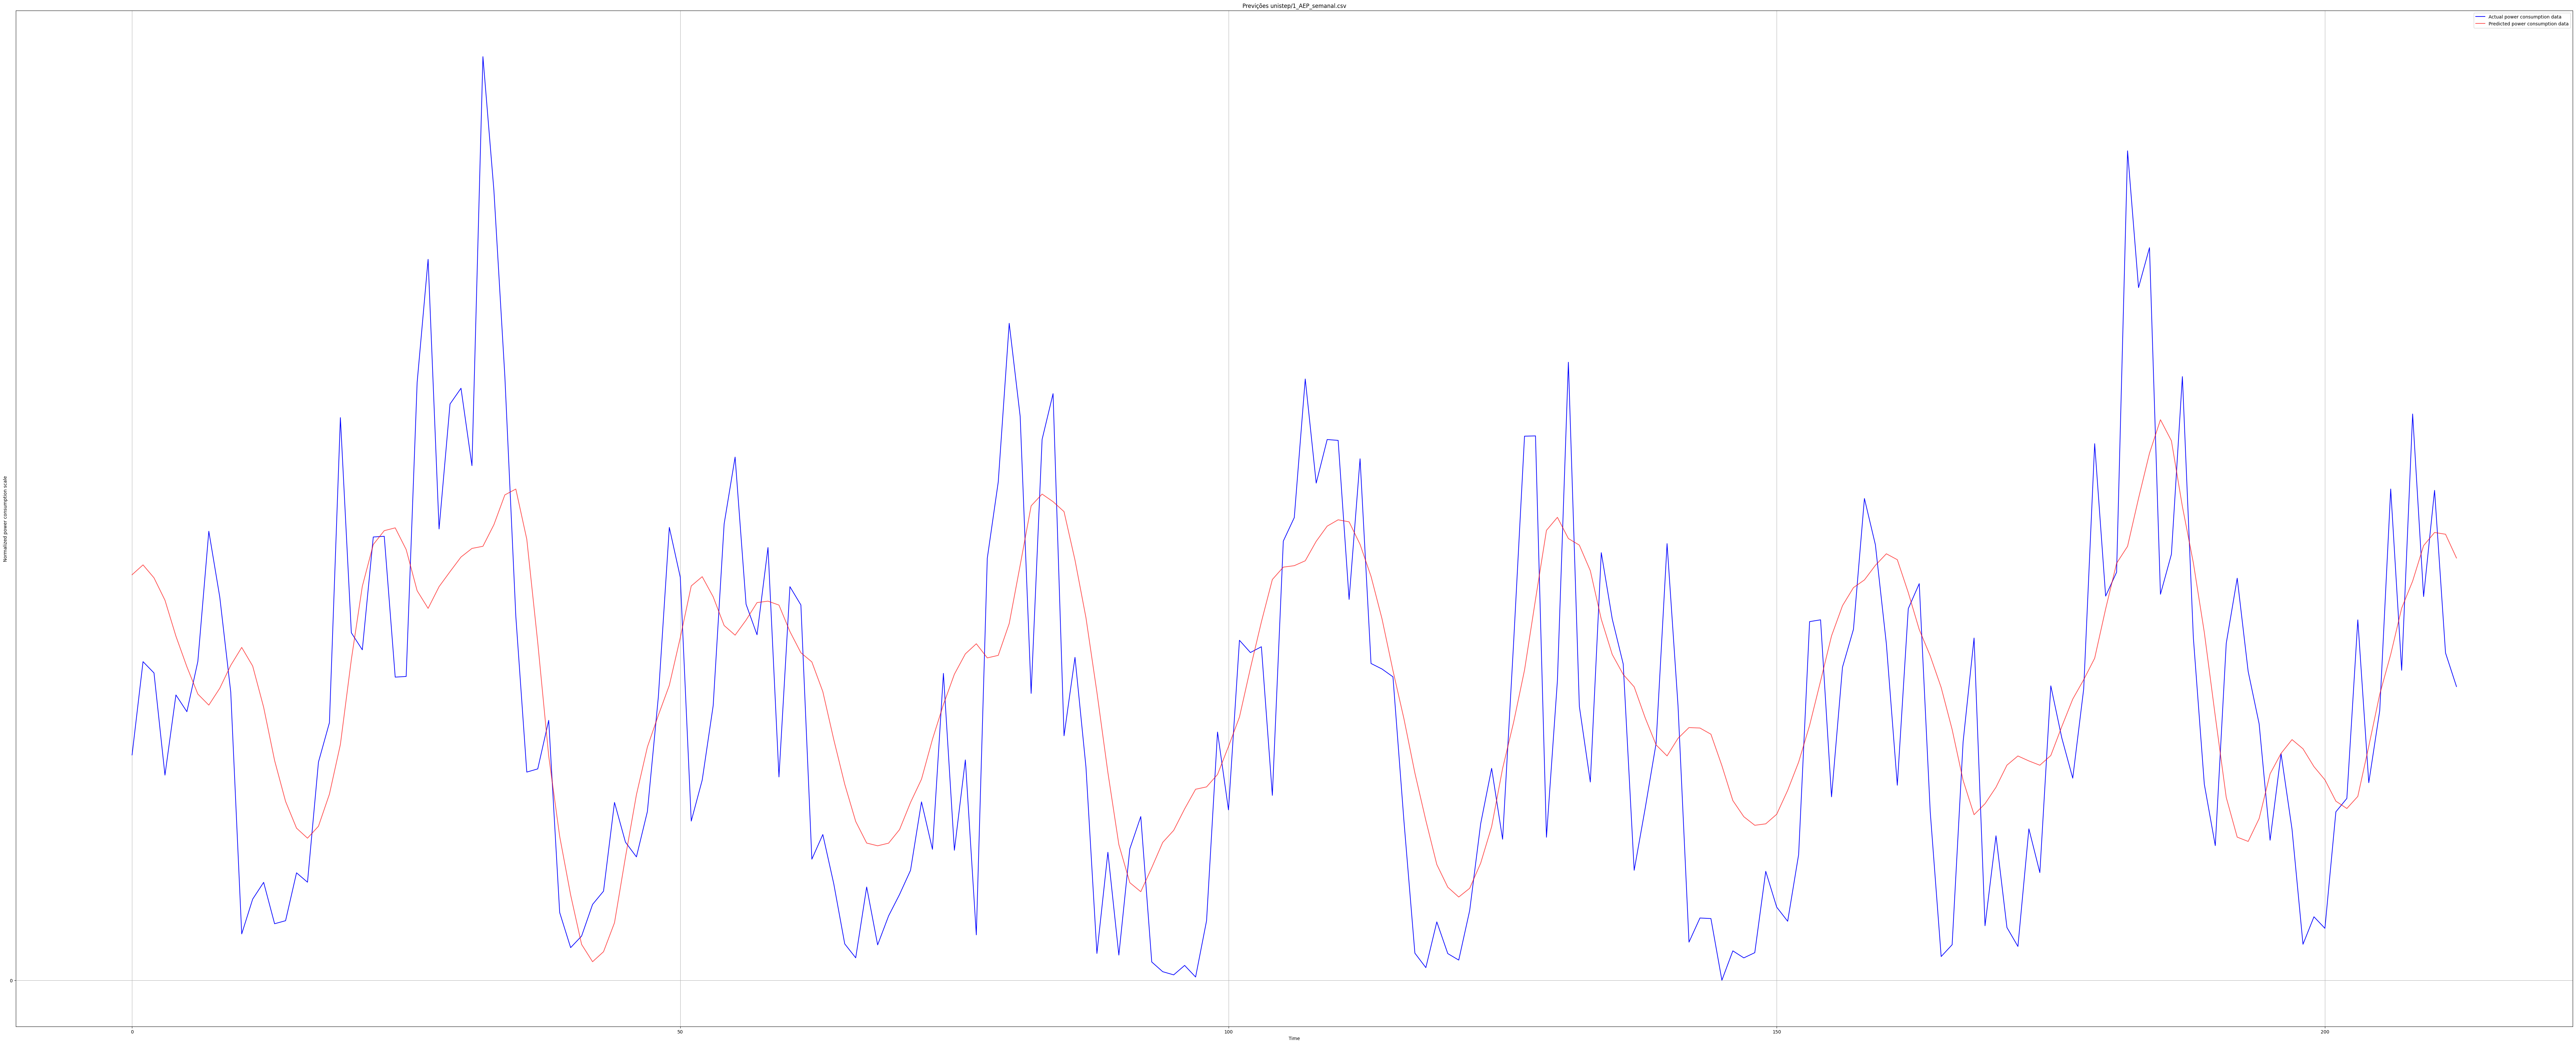

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
Tamanho de history: 12
Tamanho de prediction1: 1
Tamanho de groundtruth: 1
MAE(Erro absoluto médio) Score of LSTM model =  245438.849
 
MSE(Erro quadrático médio) Score of LSTM model =  60240228447.225
 
RMSE(Raiz do erro quadrático médio) Score of LSTM model =  245438.849
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.1
 
Accuracy Score of LSTM model =  0.0
Terminado treino/teste com proporção 0.7/0.3 -> MSE: 60240228447.225, MAE: 245438.849, MAPE: 0.1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
Tamanho de history: 12
Tamanho de prediction1: 3
Tamanho de groundtruth: 3
MAE(Erro absoluto médio) Score of LSTM model =  194969.832
 
MSE(Erro quadrático médio) Score of LSTM model =  39426759436.991
 
RMSE(Raiz do erro quadrático médio) Score of LSTM model =  198561.727
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.08
 
Accuracy Score of LSTM mod

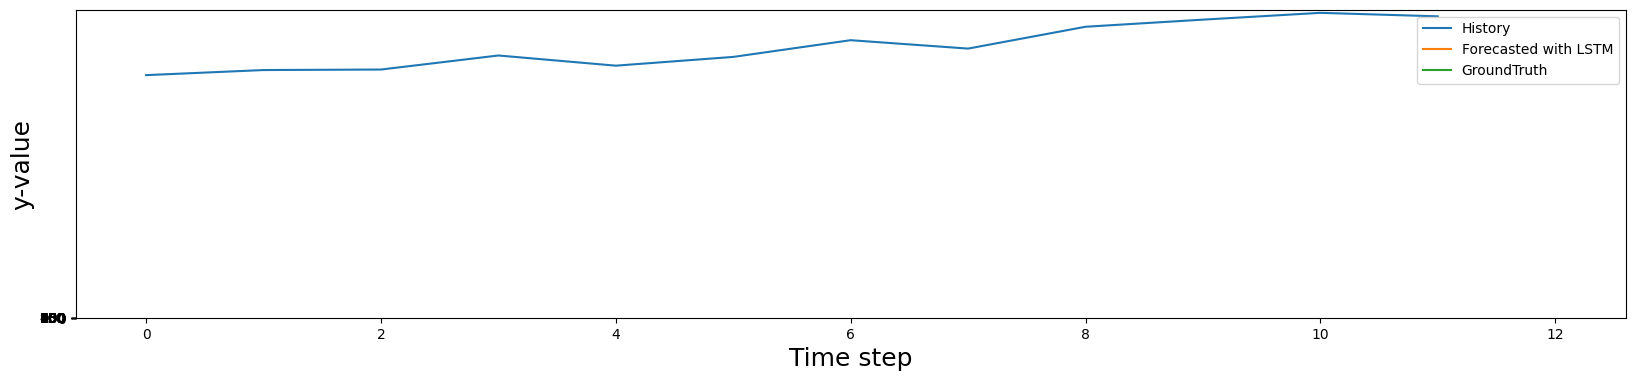

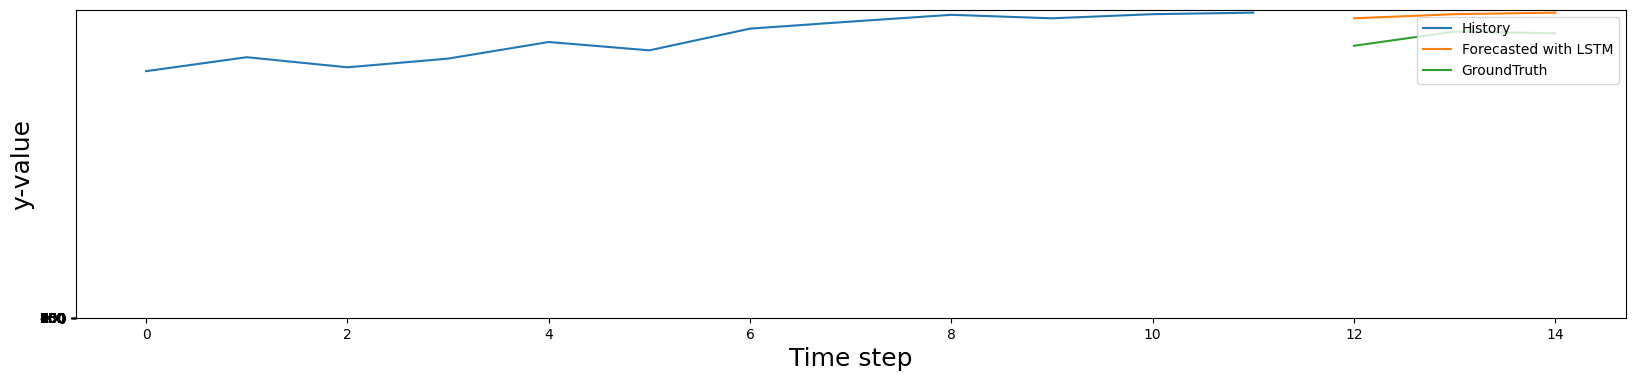

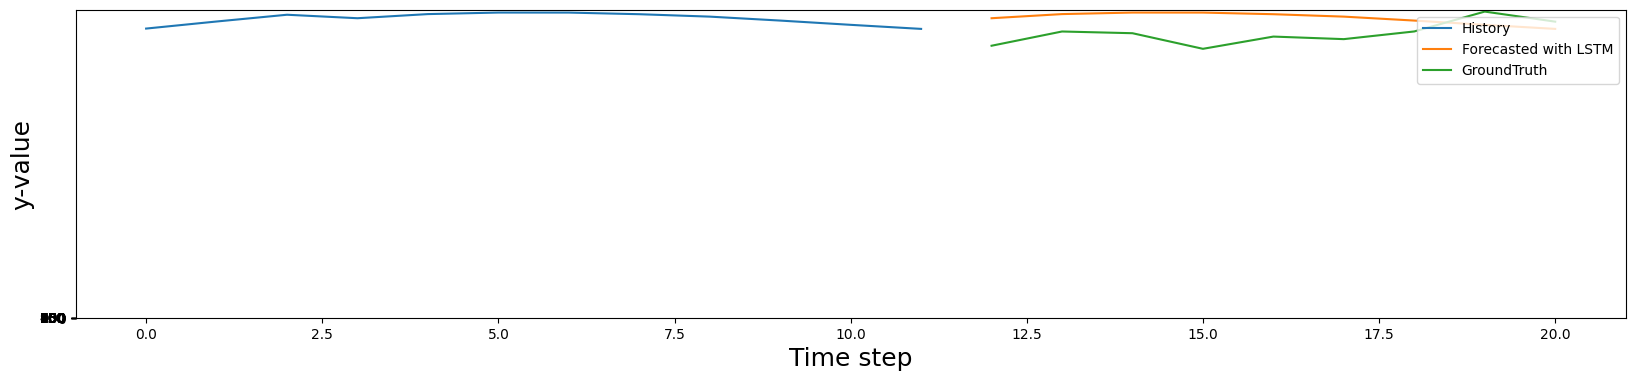

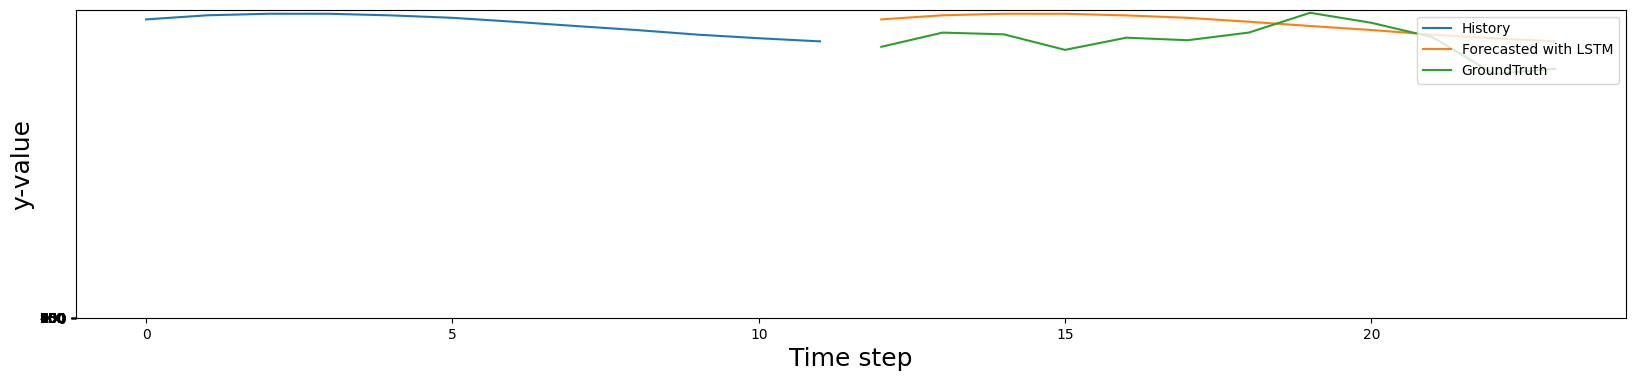

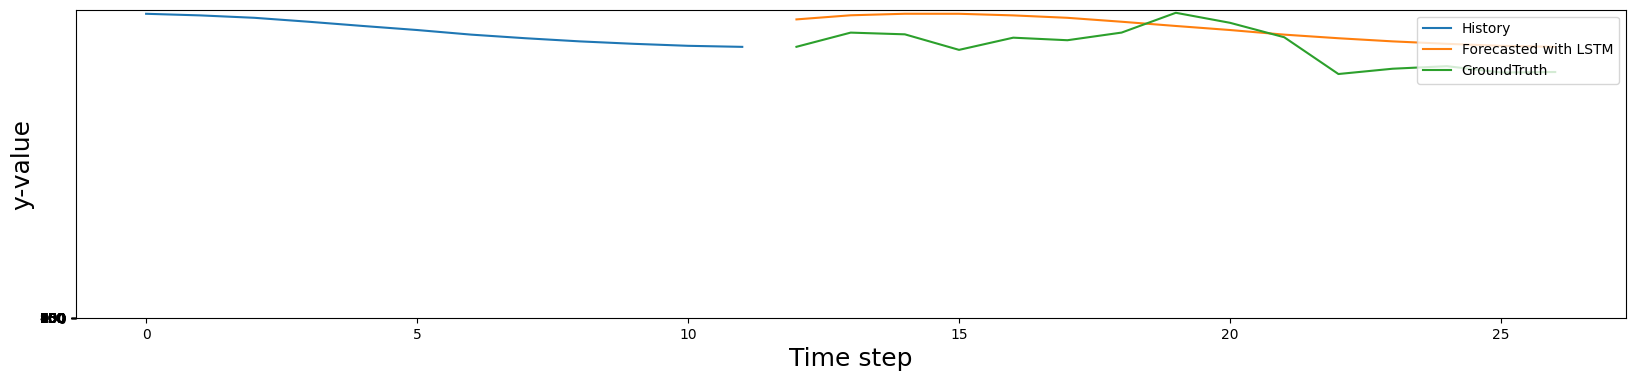

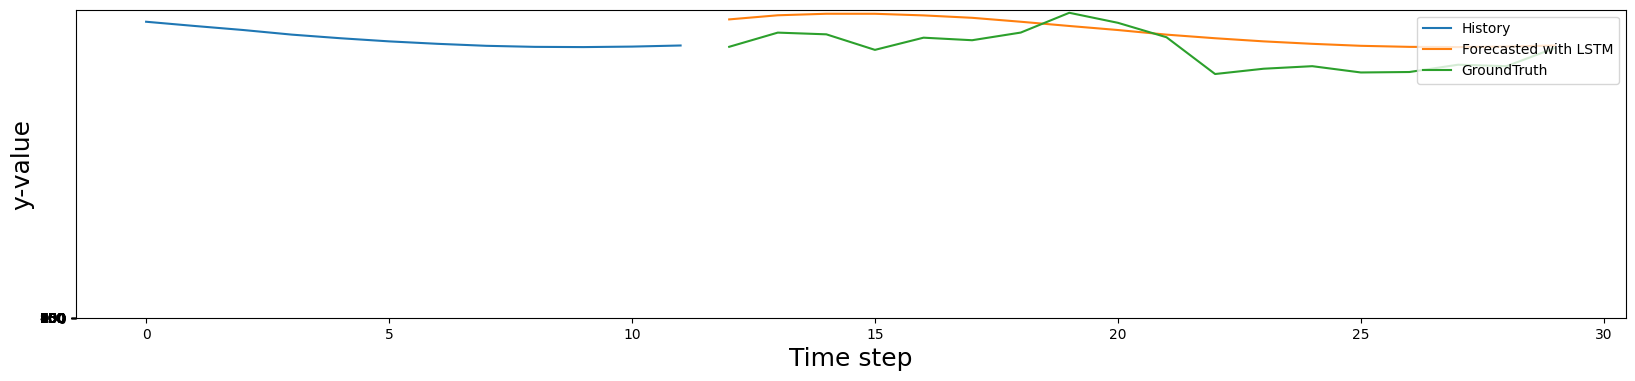

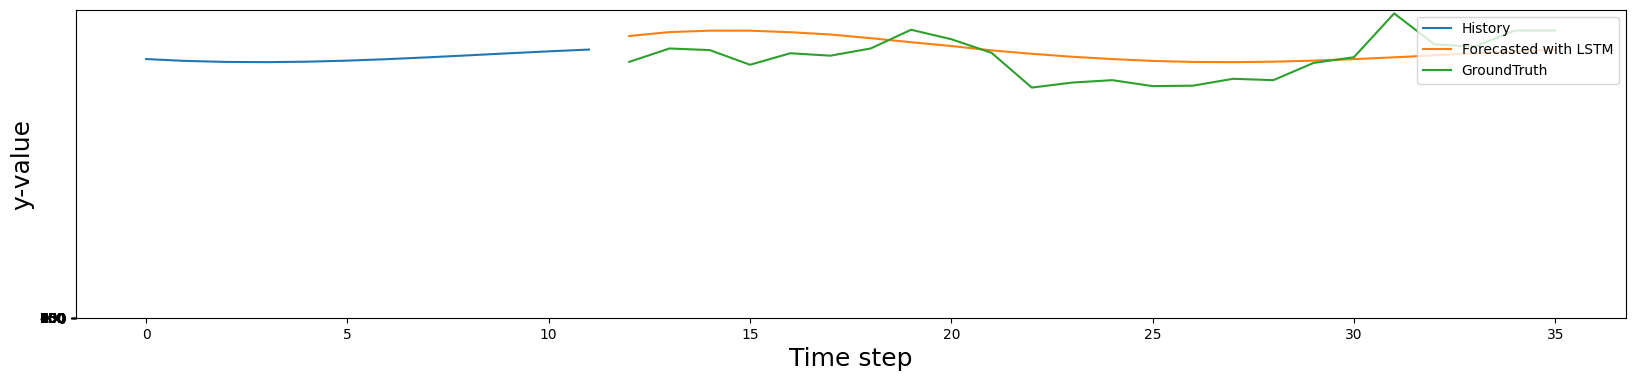

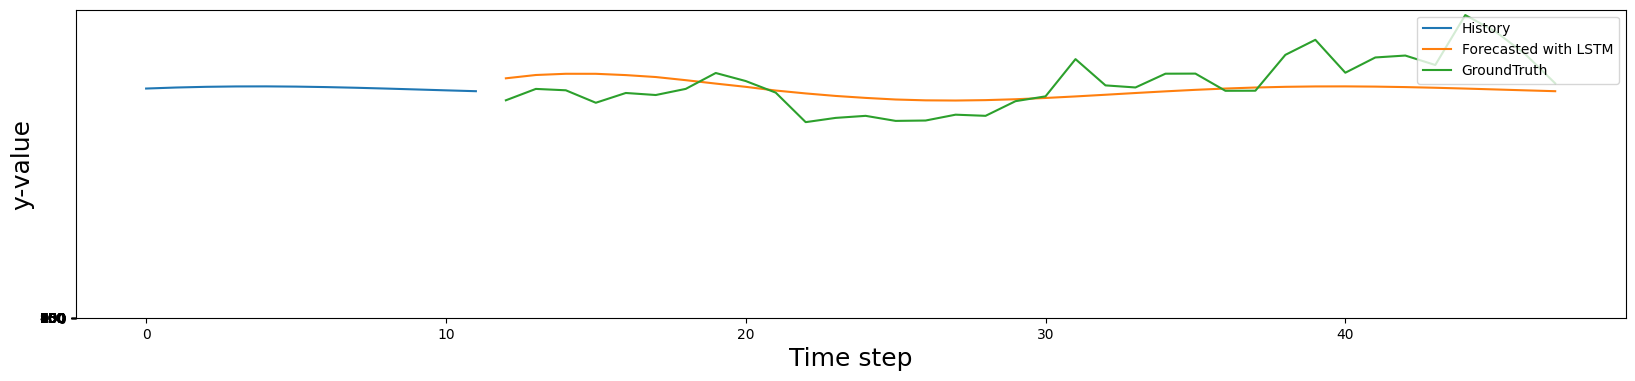

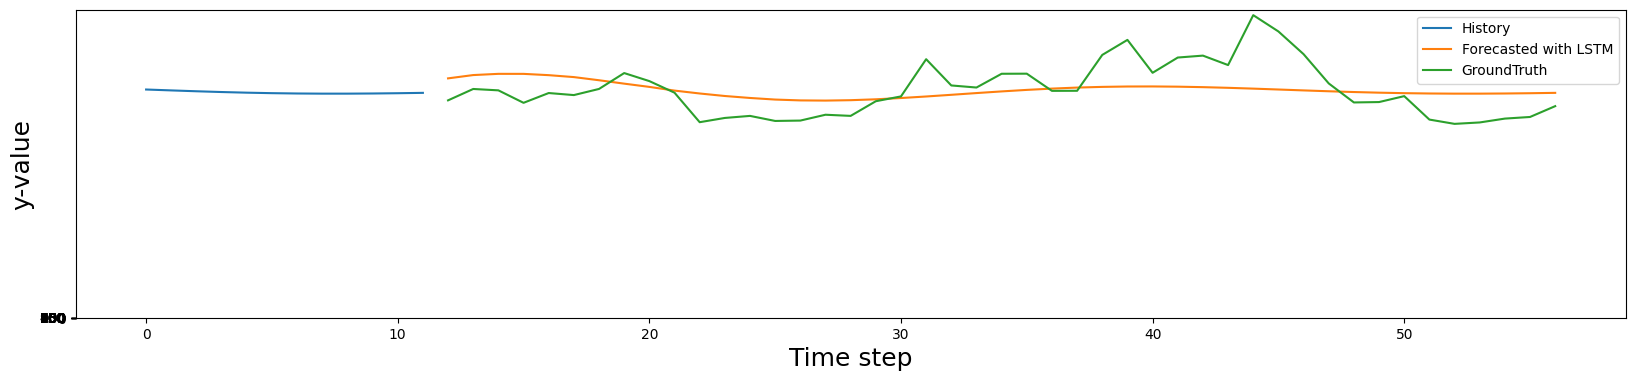

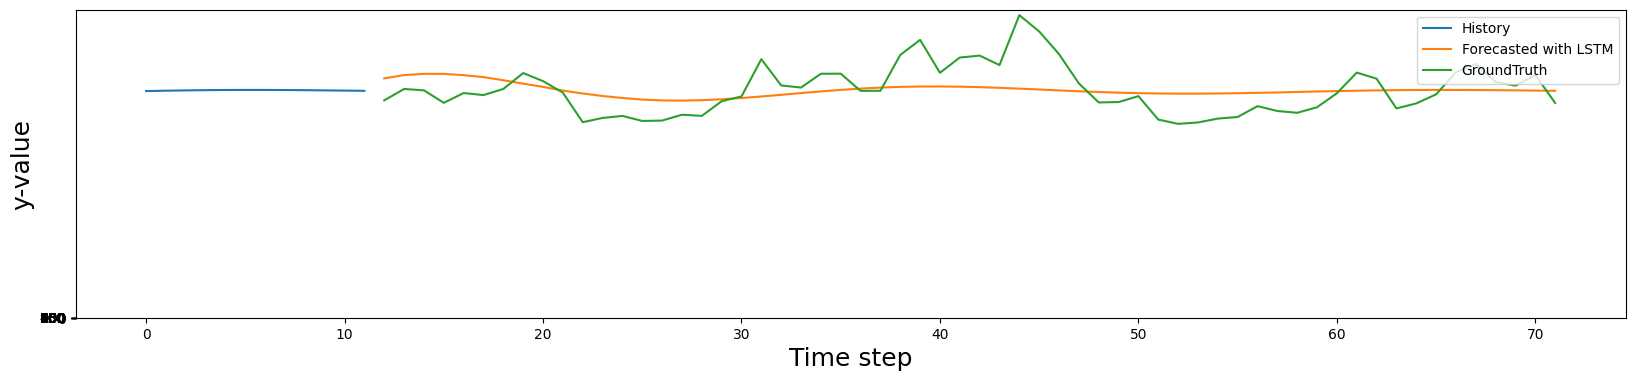

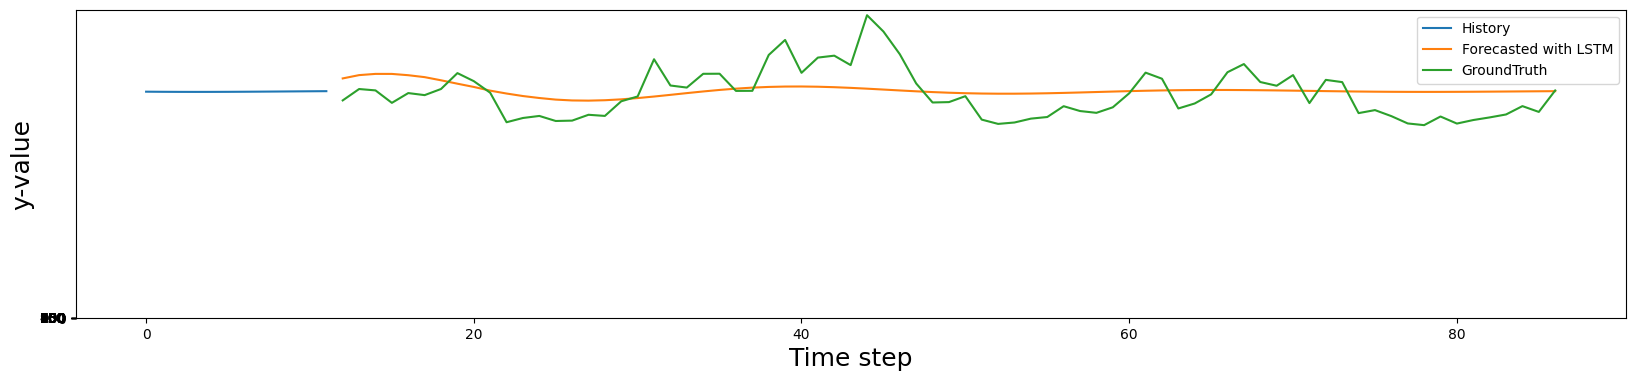

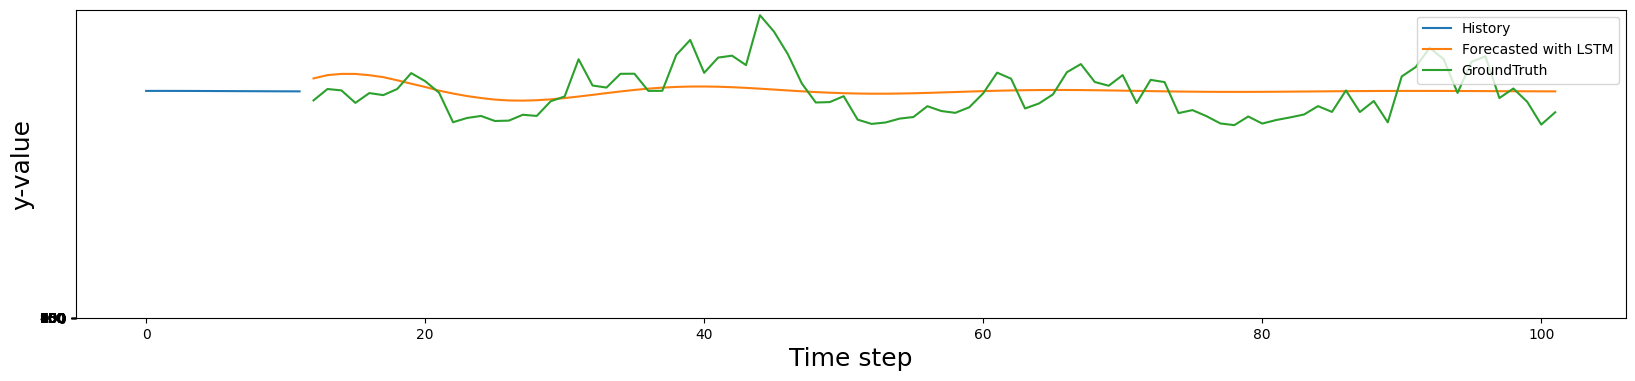

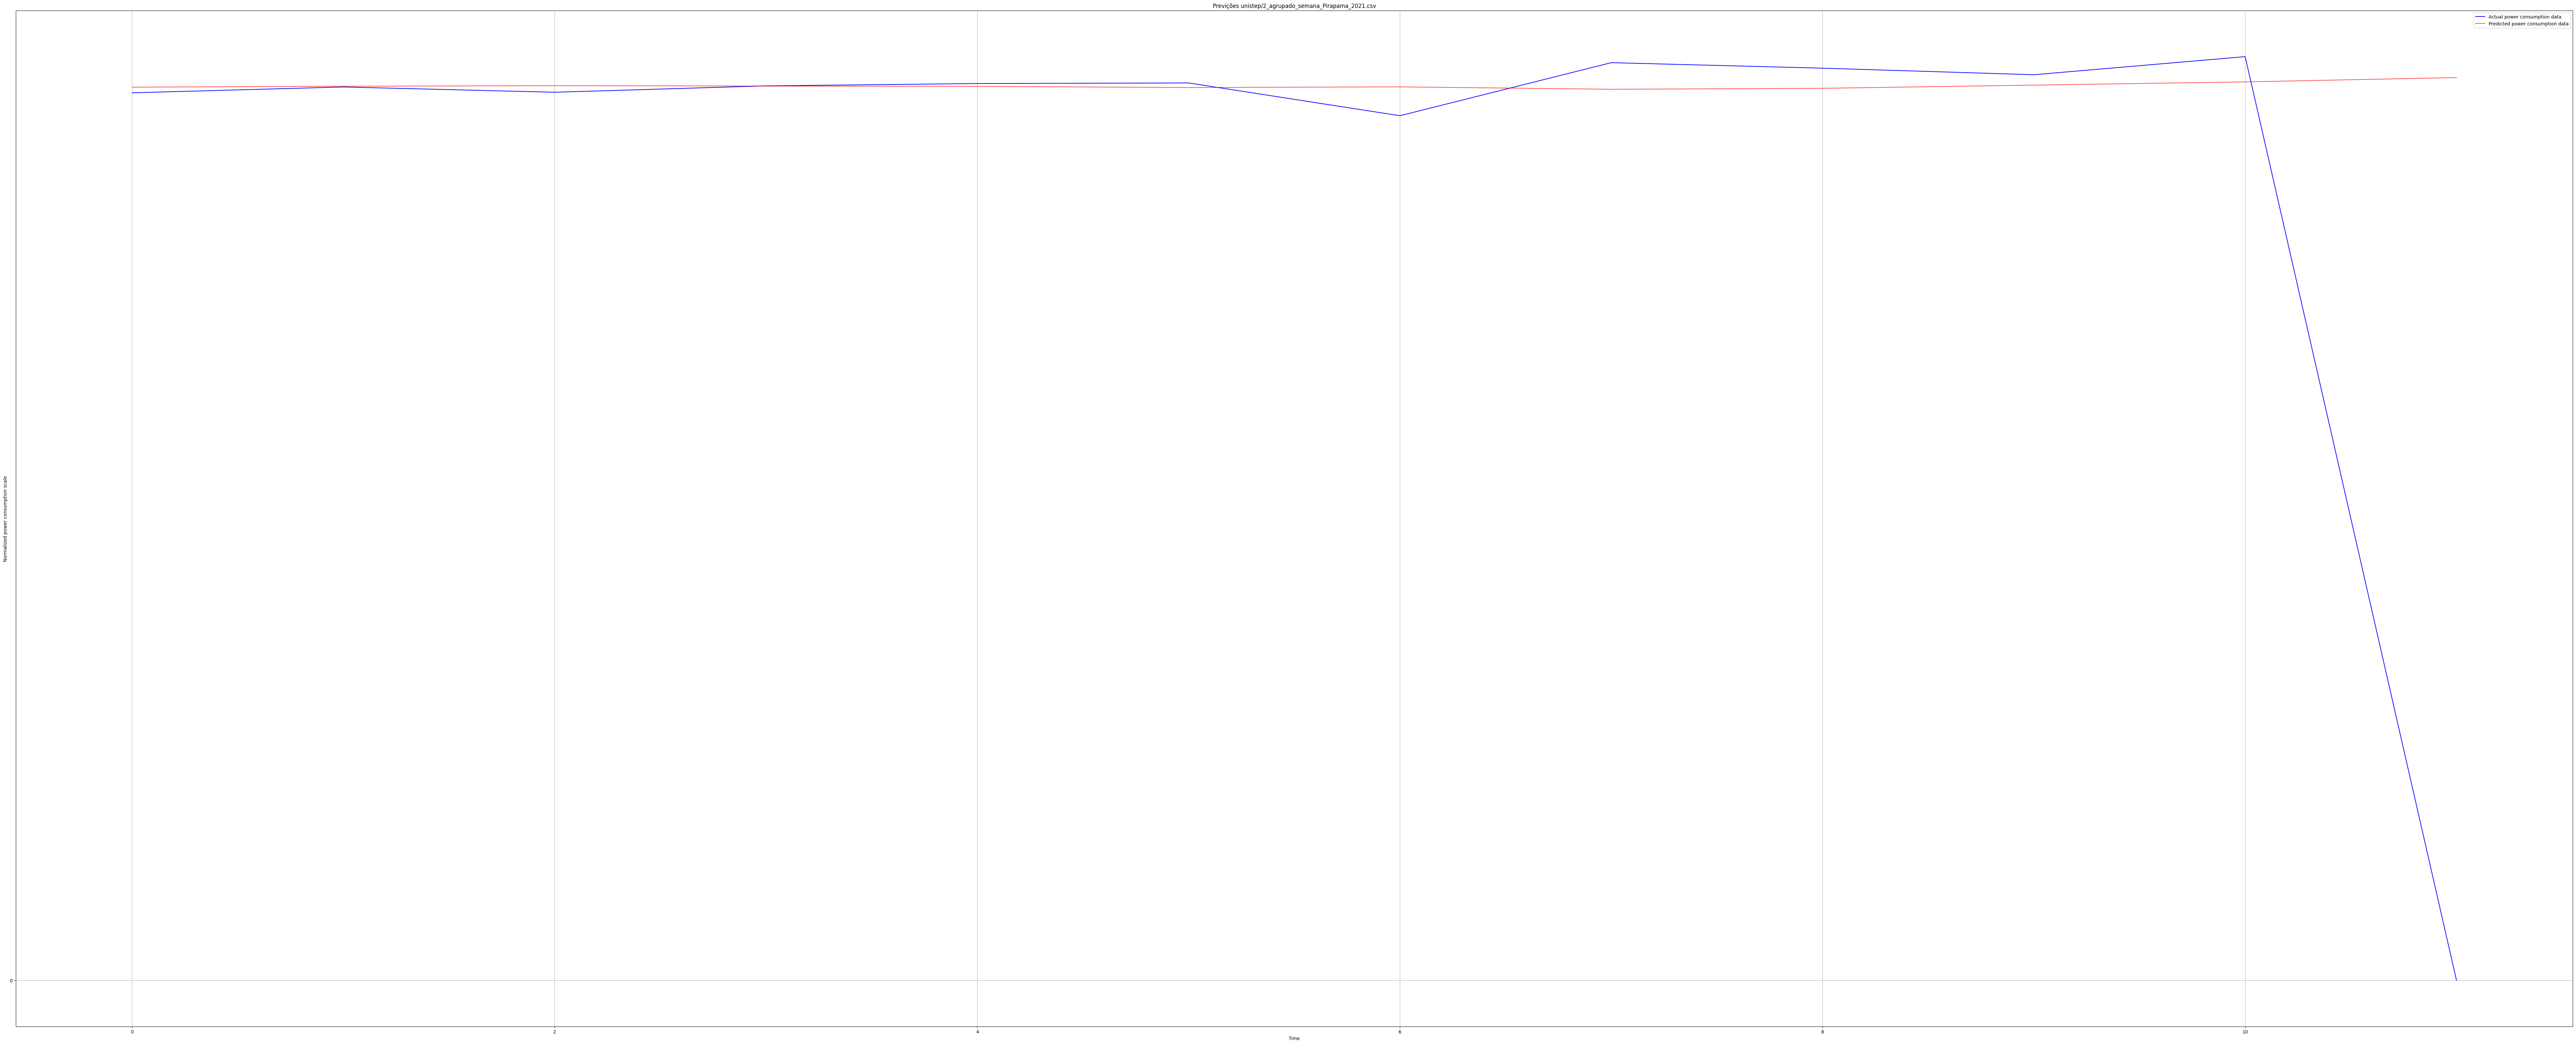

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Tamanho de history: 12
Tamanho de prediction1: 1
Tamanho de groundtruth: 1
MAE(Erro absoluto médio) Score of LSTM model =  4466.445
 
MSE(Erro quadrático médio) Score of LSTM model =  19949129.097
 
RMSE(Raiz do erro quadrático médio) Score of LSTM model =  4466.445
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.01
 
Accuracy Score of LSTM model =  100.0
Terminado treino/teste com proporção 0.7/0.3 -> MSE: 19949129.097, MAE: 4466.445, MAPE: 0.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Tamanho de history: 12
Tamanho de prediction1: 3
Tamanho de groundtruth: 3
MAE(Erro absoluto médio) Score of LSTM model =  3864.066
 
MSE(Erro quadrático médio) Score of LSTM model =  19248223.411
 
RMSE(Raiz do erro quadrático médio) Score of LSTM model =  4387.28
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.0
 
Accuracy Score of LSTM model =  100.0
Terminado t

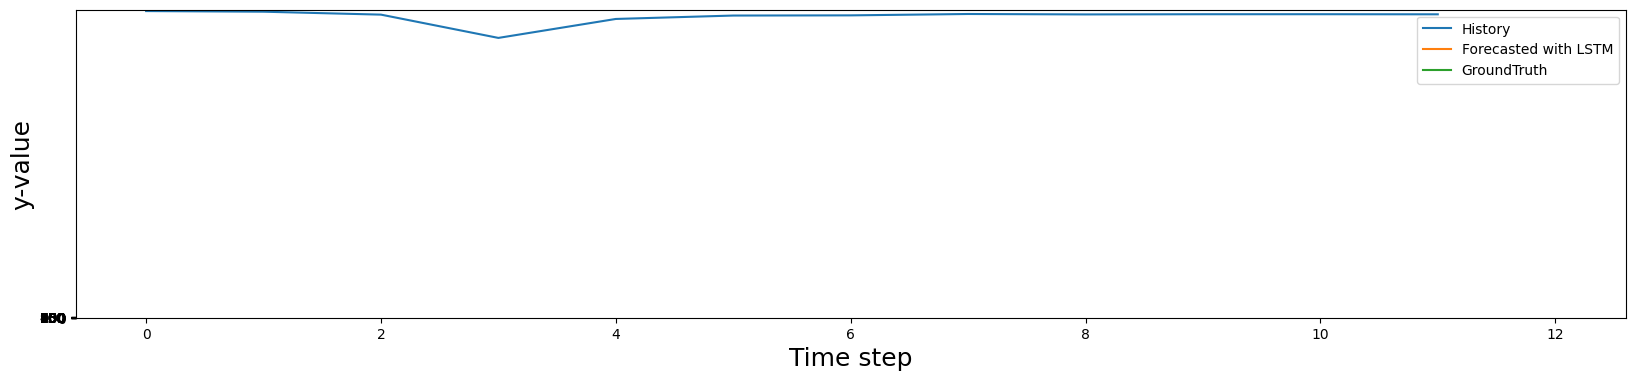

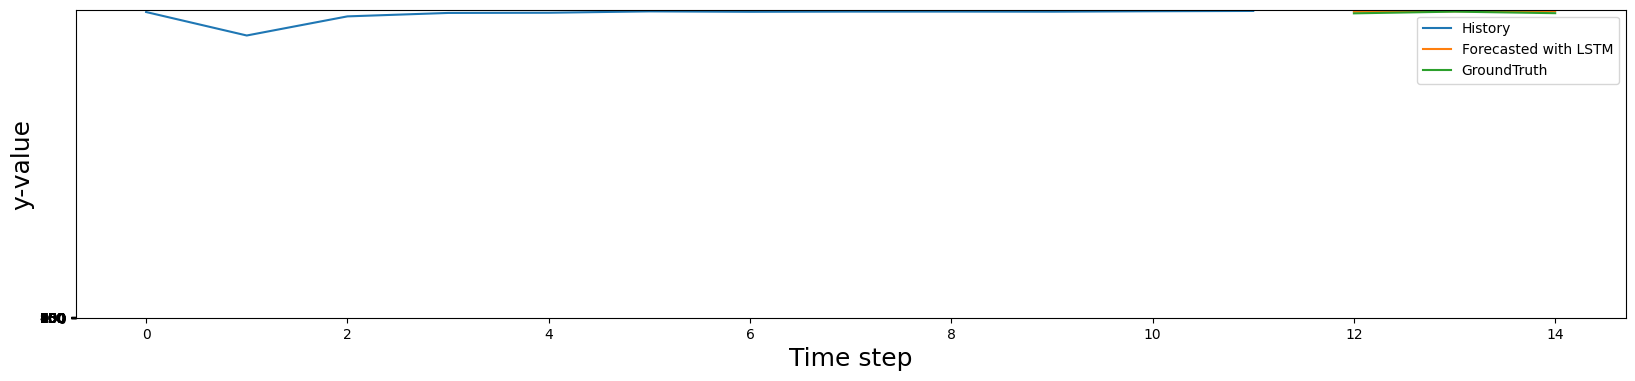

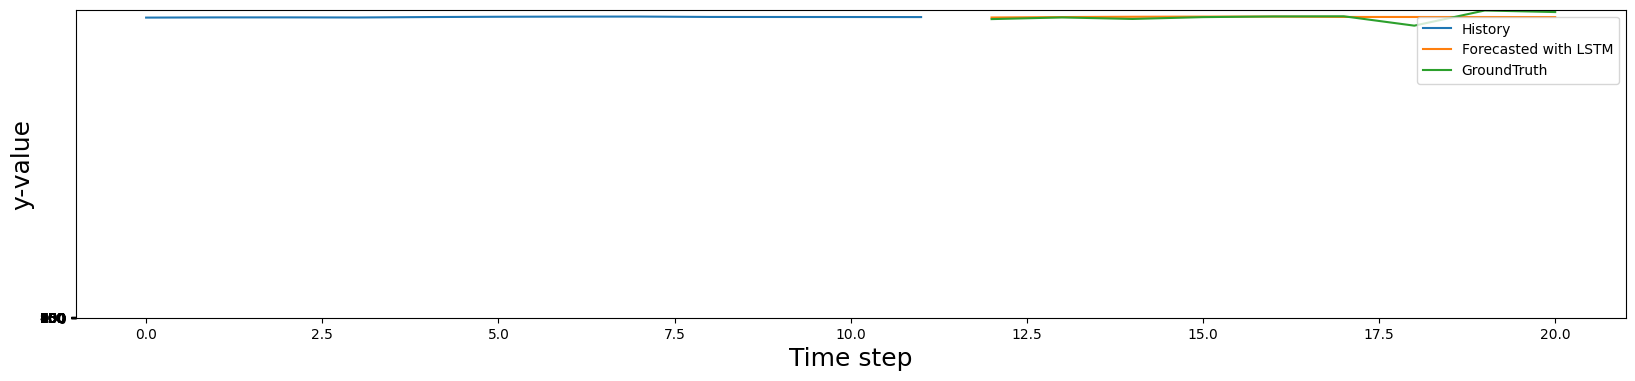

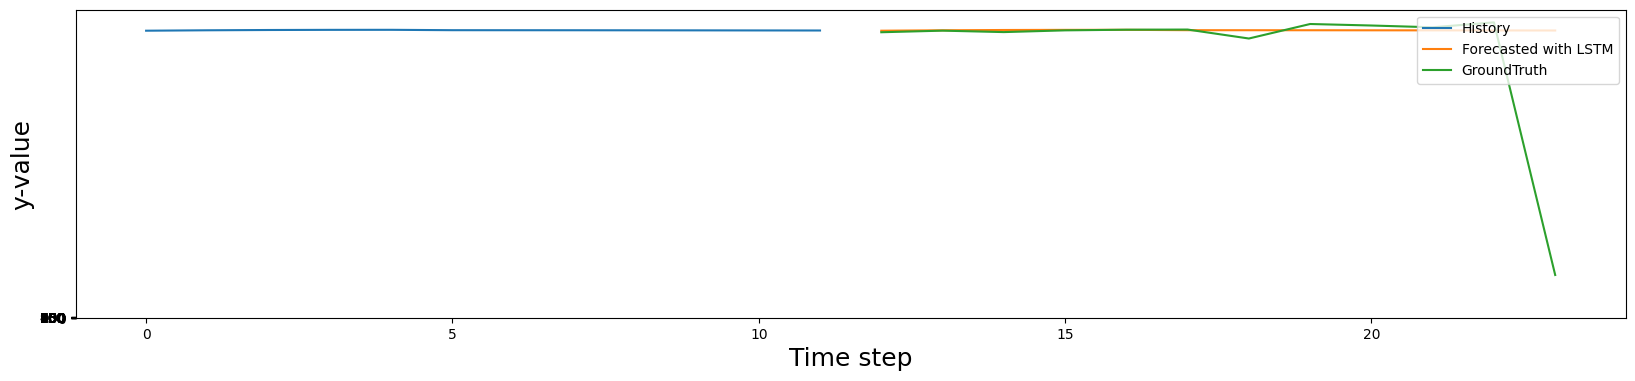

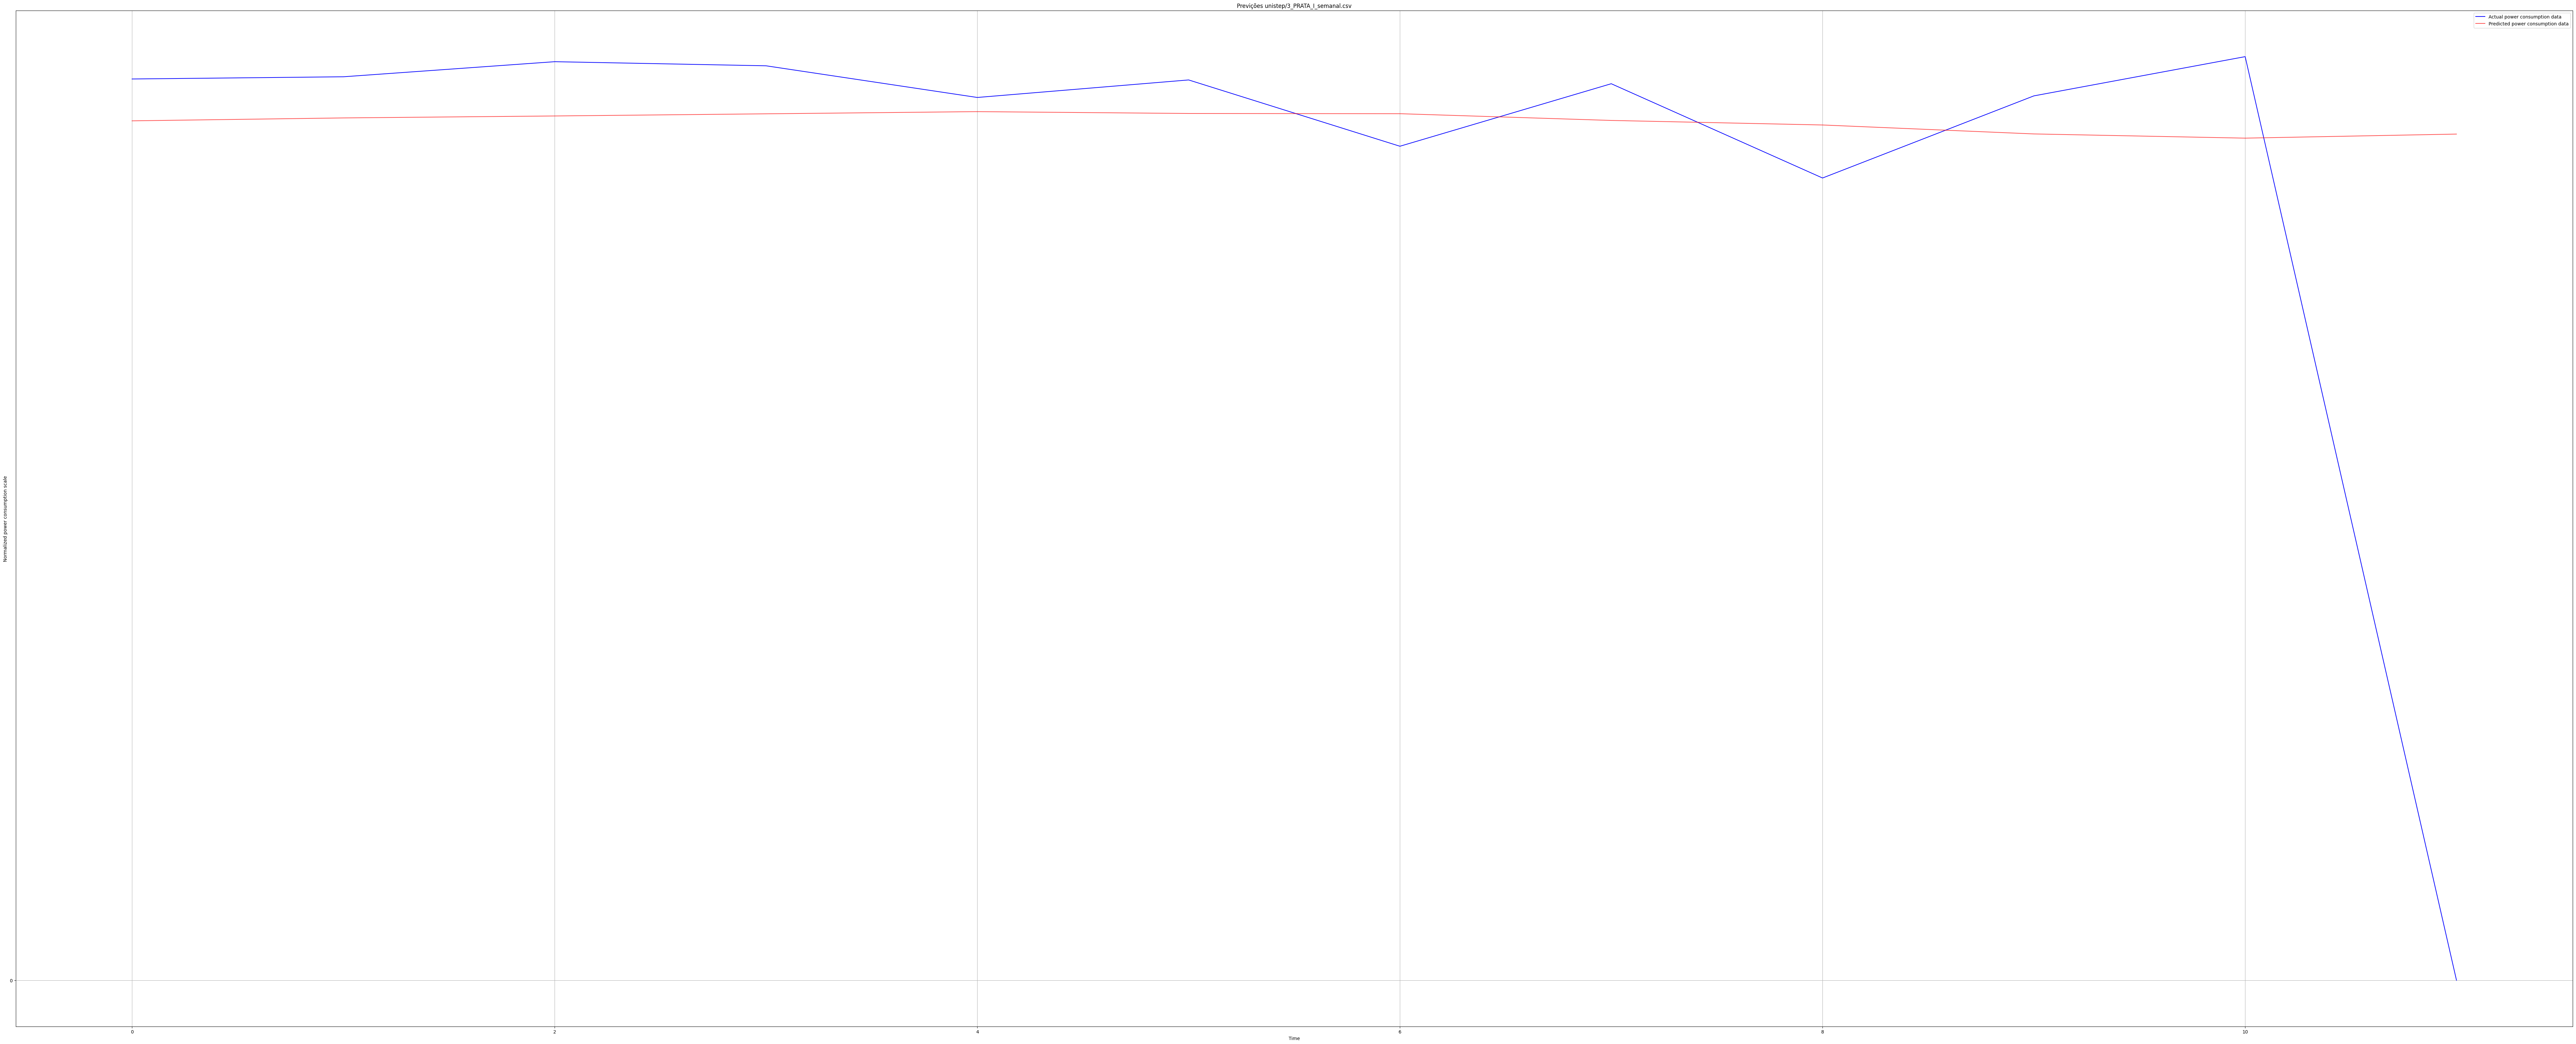

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Tamanho de history: 12
Tamanho de prediction1: 1
Tamanho de groundtruth: 1
MAE(Erro absoluto médio) Score of LSTM model =  14198.517
 
MSE(Erro quadrático médio) Score of LSTM model =  201597893.548
 
RMSE(Raiz do erro quadrático médio) Score of LSTM model =  14198.517
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.04
 
Accuracy Score of LSTM model =  100.0
Terminado treino/teste com proporção 0.7/0.3 -> MSE: 201597893.548, MAE: 14198.517, MAPE: 0.04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Tamanho de history: 12
Tamanho de prediction1: 3
Tamanho de groundtruth: 3
MAE(Erro absoluto médio) Score of LSTM model =  17058.703
 
MSE(Erro quadrático médio) Score of LSTM model =  302060511.719
 
RMSE(Raiz do erro quadrático médio) Score of LSTM model =  17379.888
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.05
 
Accuracy Score of LSTM model =  66.67
T

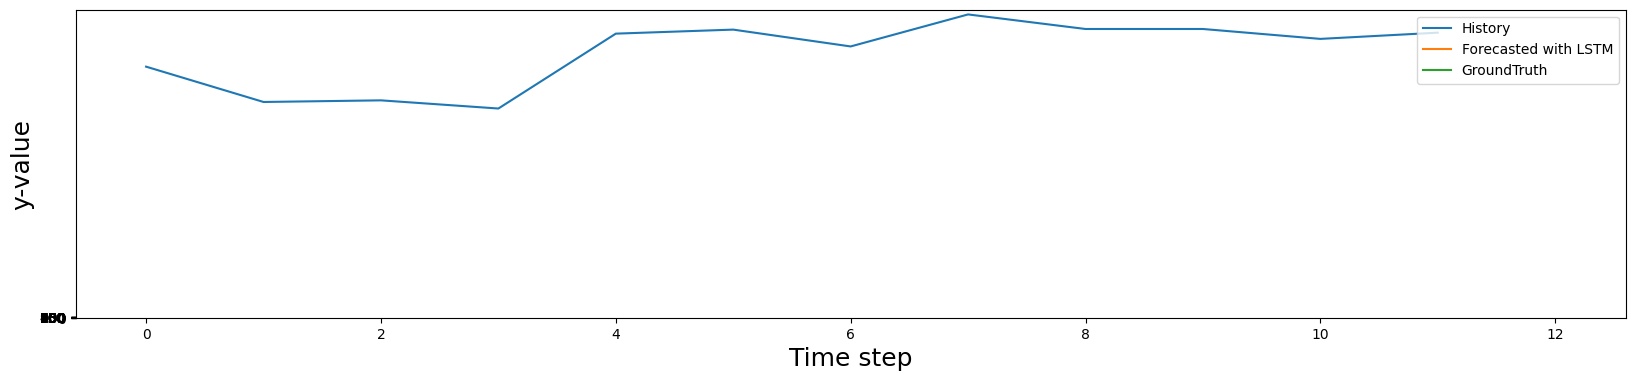

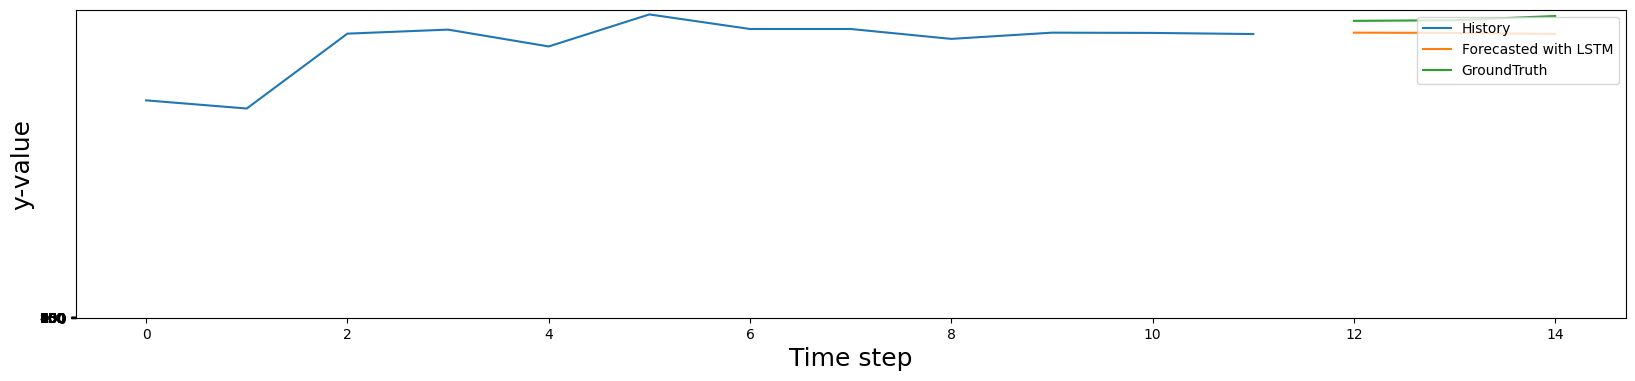

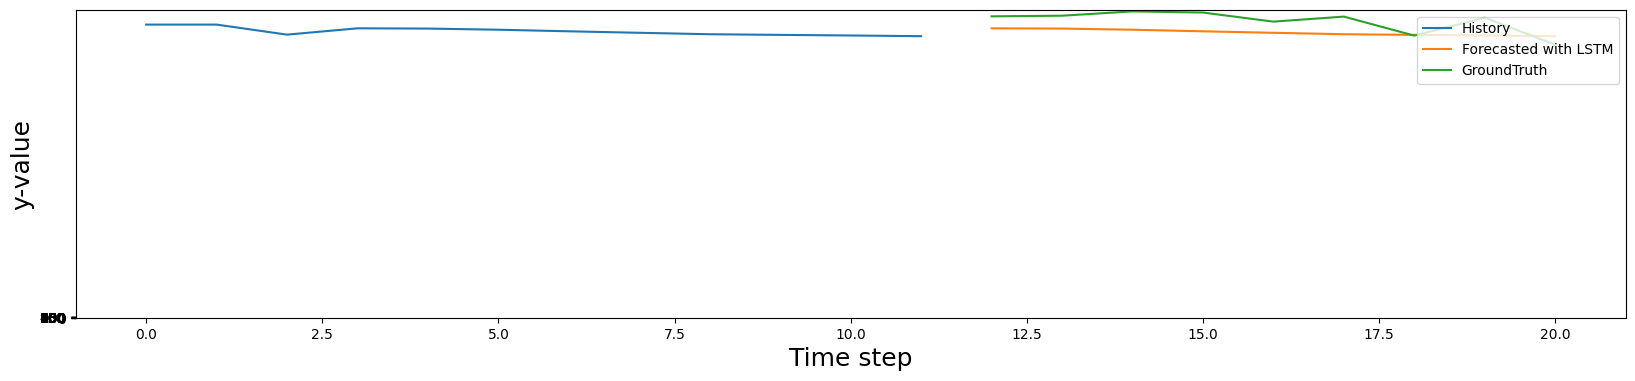

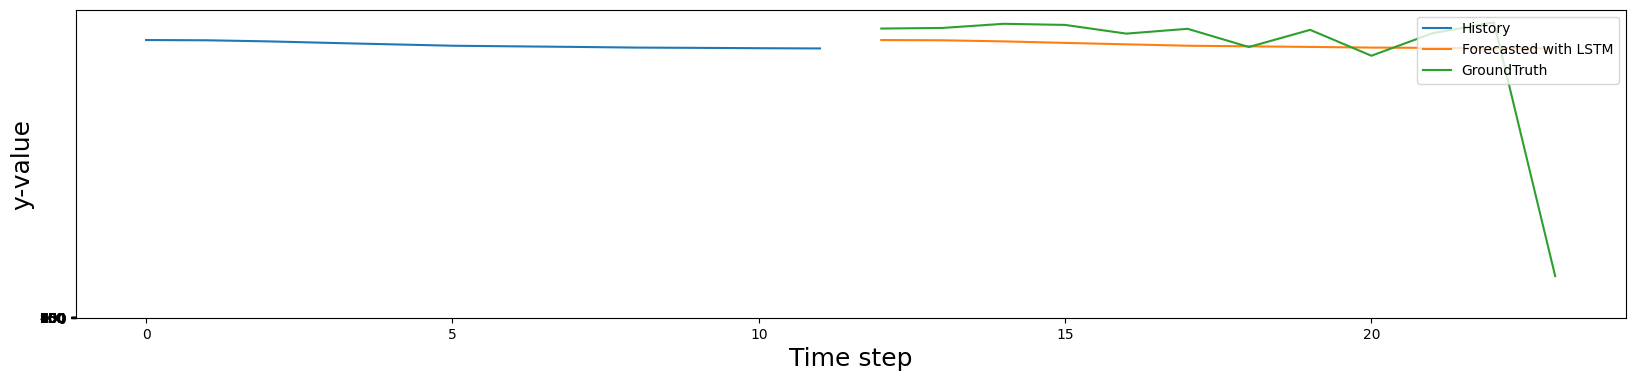

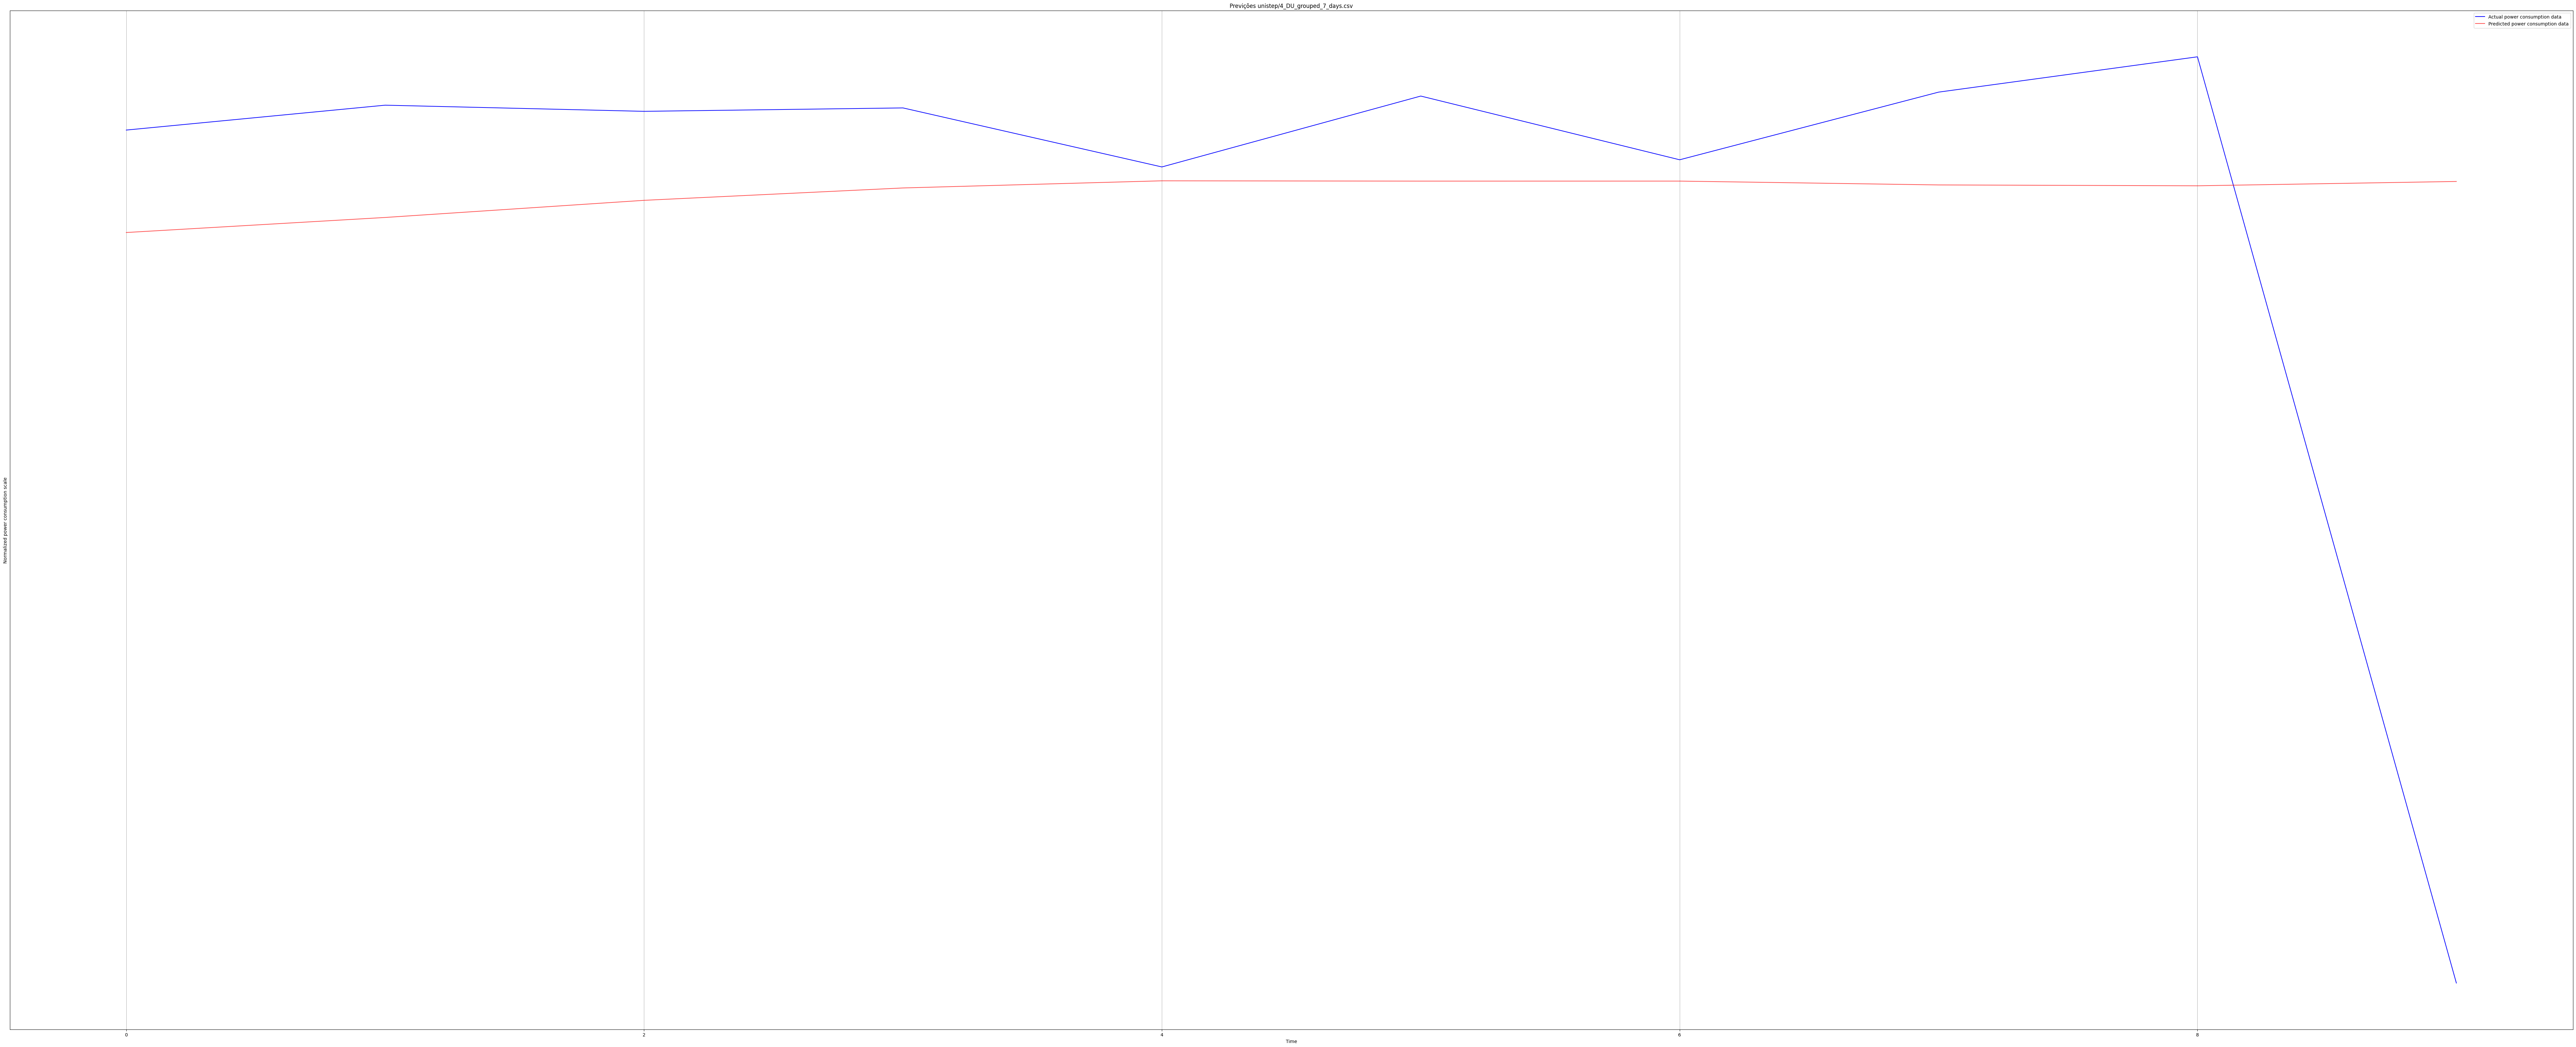

Gráfico salvo em: ./dataset/testes/teste3-semanal-com-aep/results/unistep_Duas_Unas.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 998ms/step
Tamanho de history: 12
Tamanho de prediction1: 1
Tamanho de groundtruth: 1
Gráfico salvo em: ./dataset/testes/teste3-semanal-com-aep/datasets/multistep_horizon1.png
MAE(Erro absoluto médio) Score of LSTM model =  10875.619
 
MSE(Erro quadrático médio) Score of LSTM model =  118279082.263
 
RMSE(Raiz do erro quadrático médio) Score of LSTM model =  10875.619
 
MAPE(Erro percentual médio absoluto) Score of LSTM model =  0.07
 
Accuracy Score of LSTM model =  0.0
Terminado treino/teste com proporção 0.7/0.3 -> MSE: 118279082.263, MAE: 10875.619, MAPE: 0.07
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Tamanho de history: 12
Tamanho de prediction1: 3
Tamanho de groundtruth: 3
Gráfico salvo em: ./dataset/testes/teste3-semanal-com-aep/datasets/multistep_horizon3.png
MAE(Erro absoluto médio) Score of 

In [32]:
# Loop para treinar e testar todos os datasets DIÁRIOS/SEMANAIS

#Criar modelo e carregar pesos salvos
out_steps = 1 #Comprimento do vetor de saída
neurons = 100
activation = 'tanh'
stateful = False
dropout = 0.3
timesteps = 12
train_ratio = 0.7
test_ratio = 0.3
lstm_model_treinado_days = criar_modelo(neurons, activation, stateful, dropout, timesteps, out_steps)
#carregar_e_aplicar_pesos(lstm_model_treinado_days) 

for nome, dataset in datasets_testes:
   
    df_data, max_data, min_data = MinMax(dataset)
    
    #Criar os subconjuntos de dados de treinamento/teste
    print(nome)
    X_train_U, y_train_U, X_test_U, y_test_U, y_plot_U = load_data(df_data, timesteps, out_steps, train_ratio, test_ratio)   #Chama a função load_data

    print('X_train.shape = ',X_train_U.shape)   #Printa a dimensionalidade de X_train, y_train, X_test, y_test
    print('y_train.shape = ', y_train_U.shape)
    print('X_test.shape = ', X_test_U.shape)
    print('y_test.shape = ',y_test_U.shape)
    print('y_plot.shape = ',y_plot_U.shape)
    
            #Primeira etapa - treinar modelo com 2 primeiras camadas congeladas
            #congelar_camadas(lstm_model_treinado)
    learning_rate, batch_size, patience, shuffle, optimizer, loss_function, metrics, validation_method = 0.0005, 16, 2, True, "adam", "mse", "accuracy", "k-fold"
    
    treinamento(lstm_model_treinado_days, X_train_U, y_train_U, learning_rate, batch_size, patience, shuffle, optimizer, loss_function, [metrics], validation_method)
    
            #Segunda etapa - treinar modelo com todas as camadas descongeladas
            #descongelar_camadas(lstm_model_treinado)
            #treinamento(lstm_model_treinado, X_train_U, y_train_U, learning_rate, batch_size, patience ,shuffle, optimizer, loss_function, [metrics], validation_method)
        
    #Testes com os dados Duas Unas - previsão unistep
    teste = testes(lstm_model_treinado_days, X_test_U,y_test_U, max_data, min_data)
    
    #Gráfico comparativo dos valores previstos e reais Duas Unas - previsão unistep
    plot_predictions_univar(y_test_U, teste,"Previções unistep", nome, path_datasets_results)
    
    #Definição da janela inicial de entrada para previsão
    prediction_multi = []
    janela = X_test_U[0]
    
    for horizon in (1, 3, 9, 12, 15, 18, 24, 36, 45, 60, 75, 90):
        if horizon < y_plot_U.shape[0] or horizon == y_plot_U.shape[0]:
            multistep_resultado(lstm_model_treinado_days, janela, horizon, prediction_multi, y_plot_U, train_ratio, test_ratio, batch_size, patience, optimizer, learning_rate, loss_function, metrics, shuffle, stateful, activation, neurons, timesteps, dropout, nome, max_data, min_data, path_datasets_results)
        else:
            break
    

In [33]:
# Loop para treinar e testar todos os HORÁRIOS

#Criar modelo e carregar pesos salvos
neurons = 100
activation = 'tanh'
stateful = False
dropout = 0.3
timesteps = 48
train_ratio = 0.7
test_ratio = 0.3
lstm_model_treinado_hours = criar_modelo(neurons, activation, stateful, dropout, timesteps)
carregar_e_aplicar_pesos(lstm_model_treinado_hours) 

for nome, dataset in combined_datasets_hours:
   
    df_data, max_data, min_data = MinMax(dataset)
    
    #Criar os subconjuntos de dados de treinamento/teste
    print(nome)
    X_train_U, y_train_U, X_test_U, y_test_U, y_plot_U = load_data(df_data, timesteps, out_steps, train_ratio, test_ratio)   #Chama a função load_data

    print('X_train.shape = ',X_train_U.shape)   #Printa a dimensionalidade de X_train, y_train, X_test, y_test
    print('y_train.shape = ', y_train_U.shape)
    print('X_test.shape = ', X_test_U.shape)
    print('y_test.shape = ',y_test_U.shape)
    print('y_plot.shape = ',y_plot_U.shape)
    
            #Primeira etapa - treinar modelo com 2 primeiras camadas congeladas
            #congelar_camadas(lstm_model_treinado)
    learning_rate, batch_size, patience, shuffle, optimizer, loss_function, metrics, validation_method = 0.0005, 300, 2, True, "adam", "mse", "accuracy", "k-fold"
    
    treinamento(lstm_model_treinado_hours, X_train_U, y_train_U, learning_rate, batch_size, patience, shuffle, optimizer, loss_function, [metrics], validation_method)
    
            #Segunda etapa - treinar modelo com todas as camadas descongeladas
            #descongelar_camadas(lstm_model_treinado)
            #treinamento(lstm_model_treinado, X_train_U, y_train_U, learning_rate, batch_size, patience ,shuffle, optimizer, loss_function, [metrics], validation_method)
        
    #Testes com os dados Duas Unas - previsão unistep
    teste = testes(lstm_model_treinado_hours, X_test_U,y_test_U, max_data, min_data)
    
    #Gráfico comparativo dos valores previstos e reais Duas Unas - previsão unistep
    plot_predictions_univar(y_test_U, teste,"Previções unistep para os dados Duas Unas")
    
    #Definição da janela inicial de entrada para previsão
    prediction_multi = []
    janela = X_test_U[0]
    
    for horizon in (1, 3, 9, 18, 24, 36, 48, 60, 72, 84, 96, 120, 144, 168, 192, 216, 240):
        if horizon < y_plot_U.shape[0] or horizon == y_plot_U.shape[0]:
            multistep_resultado(lstm_model_treinado_hours, janela, horizon, prediction_multi, y_plot_U, train_ratio, test_ratio, batch_size, patience, optimizer, learning_rate, loss_function, metrics, shuffle, stateful, activation, neurons, timesteps, dropout, nome, max_data, min_data)
        else:
            break
    

TypeError: criar_modelo() missing 1 required positional argument: 'out_steps'

In [35]:
# Caminho para a pasta de Duas Unas
path_DU = f'{base_path}duas_unas/hours/grouped_1_hours.csv'
dataset_DU = carregar_dados(path_DU)

NotADirectoryError: [WinError 267] O nome do diretório é inválido: './dataset/duas_unas/hours/grouped_1_hours.csv'

In [ ]:
df_DU, max_DU, min_DU = MinMax(dataset_DU)

#Criar os subconjuntos de dados de treinamento/teste
X_train_U, y_train_U, X_test_U, y_test_U, y_plot_U = load_data(df_DU, timesteps, out_steps, train_ratio, test_ratio)   #Chama a função load_data

print('X_train.shape = ',X_train_U.shape)   #Printa a dimensionalidade de X_train, y_train, X_test, y_test
print('y_train.shape = ', y_train_U.shape)
print('X_test.shape = ', X_test_U.shape)
print('y_test.shape = ',y_test_U.shape)
print('y_plot.shape = ',y_plot_U.shape)


In [ ]:
treinamento(lstm_model_treinado, X_train_U, y_train_U, learning_rate, batch_size, patience, shuffle, optimizer, loss_function, [metrics], validation_method)

#Testes com os dados Duas Unas - previsão unistep
teste = testes(lstm_model_treinado, X_test_U,y_test_U, max_PRATA, min_PRATA)
    
#Gráfico comparativo dos valores previstos e reais Duas Unas - previsão unistep
plot_predictions_univar(y_test_U, teste,"Previções unistep para os dados Duas Unas")
    
#Definição da janela inicial de entrada para previsão
prediction_multi = []
janela = X_test_U[0]
       
for horizon in (3, 9, 18, 24, 36, 48, 60, 72, 84, 96, 120, 144, 168, 192, 216, 240):
    multistep_resultado(lstm_model_treinado, janela, horizon, prediction_multi, y_plot_U, train_ratio, test_ratio, batch_size, patience, optimizer, learning_rate, loss_function, metrics, shuffle, stateful, activation, neurons, timesteps, dropout, nome, max_DU, min_DU)

In [350]:
#lstm_model_final = lstm_model_treinado

In [ ]:
#Treinamento com dados Duas Unas - Camadas Descongeladas
#treinamento(lstm_model_final,X_train_U,y_train_U,0.0001,200,2)

In [ ]:
#Testes com os dados Duas Unas
#teste2 = testes(lstm_model_final, X_test_U,y_test_U)

In [ ]:
#Gráfico comparativo dos valores previstos e reais Duas Unas
#plot_predictions_univar(y_test_U, teste2,"Predições para os dados Duas Unas")

In [355]:
# prediction = []
# janela_futuro = 720
# prediction = sequencia_completa(lstm_model_final,X_test_U[0],janela_futuro,prediction)

In [357]:
#plot_multistep(X_test_U[0],prediction,y_plot_U[:janela_futuro])

In [358]:
#lstm_model_final.save(f'{base_path}/lstm_model_treinado_etapa2(dados_com_filtro).keras')

In [ ]:
# Caminho para o arquivo do modelo salvo no Google Drive
model_path =f'{base_path}/lstm_model_treinado_etapa2(dados_com_filtro).keras'

# Carregar o modelo
model = load_model(model_path)

# Verificar a arquitetura do modelo
model.summary()

In [ ]:
lstm_model_final.get_layer(name='lstm_1').get_weights()
model.get_layer(name='lstm_1').get_weights()
print(comparar_pesos(lstm_model_final.get_layer(name='lstm_1').get_weights(), model.get_layer(name='lstm_1').get_weights()))
print(comparar_pesos(lstm_model_final.get_layer(name='lstm_2').get_weights(), model.get_layer(name='lstm_2').get_weights()))
print(comparar_pesos(lstm_model_final.get_layer(name='lstm_3').get_weights(), model.get_layer(name='lstm_3').get_weights()))

In [ ]:
X_test_U[0].shape

In [362]:
#prediction_multi_1 = []
#janela = X_test_U[500]
#janela_futuro_1 = 100 #2160

In [ ]:
#sequencia_completa(model,janela,janela_futuro_1,prediction_multi_1)

In [ ]:
print(X_test_U[0].shape)
print(len(prediction_multi_1))
print(y_plot_U[:janela_futuro_1].shape)

In [ ]:
print(type(X_test_U))
print(type(prediction_multi_1))
print(type(y_plot_U))

In [ ]:
X_test_U_norm = transf_inversa(X_test_U[500],max_DU,min_DU)
prediction_norm = transf_inversa(prediction_multi_1,max_DU,min_DU)
y_plot_U_norm = transf_inversa(y_plot_U[:janela_futuro_1],max_DU,min_DU)
print(type(X_test_U_norm))
print(type(prediction_norm))
print(type(y_plot_U_norm))
plot_multistep(X_test_U_norm,prediction_norm,y_plot_U_norm)

In [369]:
###################################################################################################

In [370]:
def incremento(X_train_U,y_train_U,y_test_U,janela_futuro):

  X_train_U_novo = np.reshape(X_train_U, (X_train_U.shape[0], seq_len)) #reshape em 2-dimension para poder concatenar
  X_test_U_2d = X_test_U[:janela_futuro].reshape(janela_futuro, -1) #reshape em 2-dimension para poder concatenar

  X_train_U_novo = pd.concat([pd.DataFrame(X_train_U_novo), pd.DataFrame(X_test_U_2d[:janela_futuro])], axis=0) #inicialmente X_test_U era transposto .T
  y_train_U_novo = pd.concat([pd.DataFrame(y_train_U), pd.DataFrame(y_test_U[:janela_futuro])], axis=0)

  X_train_U_novo = np.reshape(X_train_U_novo, (X_train_U_novo.shape[0], seq_len, 1)) #reshape em 3-dimension pq a rede LSTM exige entrada 3-dimension

  print(X_train_U_novo.shape)
  print(y_train_U_novo.shape)

  print(np.any(np.isnan(X_train_U_novo)), np.any(np.isnan(y_train_U_novo)))
  print(np.any(np.isinf(X_train_U_novo)), np.any(np.isinf(y_train_U_novo)))

  return X_train_U_novo, y_train_U_novo



In [ ]:
X_train_U.shape

In [ ]:
prediction_multi_2 = []
janela_2 = X_test_U[1080]
janela_futuro_2 = 2160

X_train_n, y_train_n = incremento(X_train_U,y_train_U,y_test_U,janela_futuro_1)

treinamento(model,X_train_n,y_train_n,0.0001,200,20)

sequencia_completa(model,janela_2,janela_futuro_1,prediction_multi_2)

In [ ]:
plot_multistep(X_test_U[1080],prediction_multi_2,y_plot_U[janela_futuro_1:janela_futuro_2])

In [ ]:
lstm_score = r2_score(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)   # Relacionado à regressão linear dos valores verdadeiros. É calculado com base no erro quadrático residual e erro total. O valor pode ser interpretado como a proporção dos valores previstos que estão na linha criada pela regressão.
print("R^2 Score of LSTM model = ",lstm_score)
print(" ")

lstm_score2 = mean_absolute_error(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)
print("MAE(Erro absoluto médio) Score of LSTM model = ",lstm_score2)
print(" ")

lstm_score3 = mean_squared_error(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)
print("MSE(Erro quadrático médio) Score of LSTM model = ",lstm_score3)
print(" ")

lstm_score4 = mean_absolute_percentage_error(y_plot_U[janela_futuro_1:janela_futuro_2], prediction_multi_2)
print("MAPE(Erro percentual médio absoluto) Score of LSTM model = ",lstm_score4)

In [ ]:
###################################################################################################

In [ ]:
# LSTM MULTISTEP - Implementação 2 (modelo Saulo)

# prediction_multi = []
# janela = X_test_U[0]
# janela_futuro = 24

# for j in range((int(X_test_U.shape[0]/janela_futuro)-80)):
#     if j == 0:
#         sequencia_completa(lstm_model_final,janela,janela_futuro,prediction_multi)
#     else:

#         X_train_U = np.reshape(X_train_U, (X_train_U.shape[0], seq_len)) #reshape em 2-dimension para poder concatenar

#         X_train_U = pd.concat([pd.DataFrame(X_train_U), pd.DataFrame(X_test_U[j-1].T)], axis=0)
#         y_train_U = pd.concat([pd.DataFrame(y_train_U), pd.DataFrame(y_test_U[j-1:j-1+seq_len])], axis=0)

#         X_train_U = np.reshape(X_train_U, (X_train_U.shape[0], seq_len, 1)) #reshape em 3-dimension pq a rede LSTM exige entrada 3-dimension

#         treinamento(lstm_model_final,X_train_U,y_train_U,0.0001,200,15)
        #treinamento(X_train,y_train)
#         janela = X_test_U[j]
#         sequencia_completa(lstm_model_final,janela,janela_futuro,prediction_multi)